In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


import matplotlib.pyplot as plt
import seaborn as sns
import platform
plt.rc('font', family='Malgun Gothic')

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
import pandas as pd
df_2013 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2013.xlsx")
df_2014 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2014.xlsx")
df_2015 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2015.xlsx")
df_2016 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2016.xlsx")
df_2017 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2017.xlsx")
df_2018 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2018.xlsx")
df_2019 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2019.xlsx")
df_2020 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2020.xlsx")
df_2021 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2021.xlsx")
df_2022 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2022.xlsx")
df_2023 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2023.xlsx")
df_2024 = pd.read_excel(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\2차drive-download-20241112T073511Z-001\df_seoul_all_2024.xlsx")


# 1 중학교
## 1.1 중학교 연도별 생성 (df_20xx_ms)

- *'시도'나 '학제'가 삭제되어 있지는 않음

In [4]:
# 데이터셋과 이름 리스트
datasets = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]
dataset_names = ['df_2013_ms', 'df_2014_ms', 'df_2015_ms', 'df_2016_ms', 'df_2017_ms',
                 'df_2018_ms', 'df_2019_ms', 'df_2020_ms', 'df_2021_ms', 'df_2022_ms', 'df_2023_ms', 'df_2024_ms']

# 각 데이터셋을 처리하고, 원래 변수명으로 할당
for df, name in zip(datasets, dataset_names):
    # 열이 존재하는지 확인
    required_columns = ['연도', '중학교_유예_대안교육_전체', '중학교_유예_대안교육_여자']
    available_columns = [col for col in required_columns if col in df.columns]
    
    if available_columns:
        # 필요한 열을 선택하고 concat하여 새로운 데이터프레임 생성
        df_ms = pd.concat([df.loc[:, '시도':'중학교_면제_기타_여자'], df[available_columns]], axis=1)
        
        # 처리된 데이터프레임을 원래 이름으로 동적 할당
        globals()[name] = df_ms  # 'df_2013_ms', 'df_2014_ms' 등으로 할당
        
        
        print(f"Processed dataset: {name}")
    else:
        print(f"Columns not found in {name}")

Processed dataset: df_2013_ms
Processed dataset: df_2014_ms
Processed dataset: df_2015_ms
Processed dataset: df_2016_ms
Processed dataset: df_2017_ms
Processed dataset: df_2018_ms
Processed dataset: df_2019_ms
Processed dataset: df_2020_ms
Processed dataset: df_2021_ms
Processed dataset: df_2022_ms
Processed dataset: df_2023_ms
Processed dataset: df_2024_ms


## 1.2 df_ms_all : 중학교 전체 합친 테이블 생성

In [5]:
# 예를 들어, 첫 번째 데이터프레임의 열을 기준으로 공통 열을 정의
common_columns = df_2013_ms.columns  # 첫 번째 데이터프레임의 열을 공통 열로 설정

# 모든 데이터프레임의 중복 열을 제거한 후 concat 수행
tables = [df.loc[:, ~df.columns.duplicated()].reindex(columns=common_columns).reset_index(drop=True) for df in [
    df_2013_ms, df_2014_ms, df_2015_ms, df_2016_ms, df_2017_ms,
    df_2018_ms, df_2019_ms, df_2020_ms, df_2021_ms, df_2022_ms,
    df_2023_ms, df_2024_ms
]]

# 모든 데이터프레임을 행 방향으로 합치기
df_ms_all = pd.concat(tables, ignore_index=True)

# '학제'가 '중학교'인 행만 선택하고, '학제'와 '시도' 열을 제거
df_ms_all = df_ms_all.loc[df_ms_all['학제']=='중학교']
df_ms_all.drop(columns=['학제', '시도'], inplace=True)


In [6]:
df_ms_all.reset_index()

index 행정구역  학업중단자_전체  학업중단자_여자  중학교_유예_유예계_전체  중학교_유예_유예계_여자  \
0        0  종로구      62.0      30.0           47.0           20.0   
1        7   중구      35.0      18.0           31.0           17.0   
2       14  용산구      99.0      46.0           85.0           39.0   
3       20  성동구      91.0      43.0           81.0           37.0   
4       26  광진구     149.0      78.0          112.0           58.0   
..     ...  ...       ...       ...            ...            ...   
280   1964  관악구      39.0      19.0           15.0            8.0   
281   1970  서초구     288.0     148.0          107.0           51.0   
282   1976  강남구     428.0     225.0          134.0           66.0   
283   1983  송파구     256.0     117.0           80.0           37.0   
284   1990  강동구      88.0      44.0           21.0           11.0   

     중학교_유예_질병_전체  중학교_유예_질병_여자  중학교_유예_장기결석_전체  중학교_유예_장기결석_여자  ...  \
0             2.0           2.0            16.0             6.0  ...   
1             1.0           0.0            15.0            11.0  ...   
2             2.0           0.0            21.0            10.0  ...   
3             6.0           4.0            30.0            12.0  ...   
4             1.0           0.0            37.0            20.0  ...   
..            ...           ...             ...             ...  ...   
280           2.0           0.0             NaN             NaN  ...   
281           7.0           5.0             NaN             NaN  ...   
282           7.0           4.0             NaN             NaN  ...   
283           3.0           2.0             NaN             NaN  ...   
284           1.0           1.0             NaN             NaN  ...   

     중학교_유예_기타_여자  중학교_면제_면제계_전체  중학교_면제_면제계_여자  중학교_면제_질병_전체  중학교_면제_질병_여자  \
0             4.0           15.0           10.0           0.0           0.0   
1             2.0            4.0            1.0           0.0           0.0   
2            11.0           14.0            7.0           0.0           0.0   
3             3.0           10.0            6.0           1.0           0.0   
4            14.0           37.0           20.0           0.0           0.0   
..            ...            ...            ...           ...           ...   
280           5.0           16.0            7.0           0.0           0.0   
281          30.0          103.0           53.0           0.0           0.0   
282          37.0          156.0           80.0           0.0           0.0   
283          20.0           95.0           39.0           0.0           0.0   
284           5.0           34.0           14.0           0.0           0.0   

     중학교_면제_해외출국_전체  중학교_면제_해외출국_여자  중학교_면제_기타_전체  중학교_면제_기타_여자    연도  
0              15.0            10.0           0.0           0.0  2013  
1               2.0             0.0           2.0           1.0  2013  
2              10.0             4.0           4.0           3.0  2013  
3               9.0             6.0           0.0           0.0  2013  
4              36.0            19.0           1.0           1.0  2013  
..              ...             ...           ...           ...   ...  
280            14.0             6.0           2.0           1.0  2024  
281            96.0            47.0           7.0           6.0  2024  
282           150.0            77.0           6.0           3.0  2024  
283            93.0            37.0           2.0           2.0  2024  
284            32.0            13.0           2.0           1.0  2024  

[285 rows x 23 columns]

In [7]:
df_ms_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 1990
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             285 non-null    object 
 1   학업중단자_전체         285 non-null    float64
 2   학업중단자_여자         285 non-null    float64
 3   중학교_유예_유예계_전체    285 non-null    float64
 4   중학교_유예_유예계_여자    285 non-null    float64
 5   중학교_유예_질병_전체     285 non-null    float64
 6   중학교_유예_질병_여자     285 non-null    float64
 7   중학교_유예_장기결석_전체   260 non-null    float64
 8   중학교_유예_장기결석_여자   260 non-null    float64
 9   중학교_유예_미인정유학_전체  260 non-null    float64
 10  중학교_유예_미인정유학_여자  260 non-null    float64
 11  중학교_유예_기타_전체     285 non-null    float64
 12  중학교_유예_기타_여자     285 non-null    float64
 13  중학교_면제_면제계_전체    285 non-null    float64
 14  중학교_면제_면제계_여자    285 non-null    float64
 15  중학교_면제_질병_전체     285 non-null    float64
 16  중학교_면제_질병_여자     285 non-null    float64
 17  중학교_면제_해외출국_전체   285

### 1.2.1 df_ms_1 (중학교 디폴트열만 추출한 테이블)

In [8]:
#df_ms_1 : 행정구역 및 연도별 학업중단유형 대분류(면제와 유예 ) 합계
df_ms_1 = df_ms_all.pivot_table(index=['연도','행정구역'], values=['중학교_면제_기타_전체','중학교_면제_질병_전체','중학교_면제_해외출국_전체','중학교_유예_기타_전체','중학교_유예_미인정유학_전체','중학교_유예_장기결석_전체','중학교_유예_질병_전체'],aggfunc='sum')
df_ms_1 = df_ms_1.reset_index()
cond1 = (df_ms_1['행정구역'] != '소계')
df_ms_1 = df_ms_1.loc[cond1] 
df_ms_1

연도 행정구역  중학교_면제_기타_전체  중학교_면제_질병_전체  중학교_면제_해외출국_전체  중학교_유예_기타_전체  \
0    2013  강남구           7.0           0.0           173.0          41.0   
1    2013  강동구           4.0           0.0            29.0          23.0   
2    2013  강북구           2.0           0.0             8.0           2.0   
3    2013  강서구           2.0           1.0            28.0          14.0   
4    2013  관악구           0.0           0.0            32.0          21.0   
..    ...  ...           ...           ...             ...           ...   
280  2024  용산구           0.0           0.0            10.0          13.0   
281  2024  은평구           0.0           0.0            25.0          13.0   
282  2024  종로구           1.0           0.0             9.0           9.0   
283  2024   중구           1.0           0.0            12.0           5.0   
284  2024  중랑구           2.0           0.0             1.0           3.0   

     중학교_유예_미인정유학_전체  중학교_유예_장기결석_전체  중학교_유예_질병_전체  
0              318.0            22.0          12.0  
1               43.0            29.0           6.0  
2               16.0            38.0           1.0  
3               52.0            46.0           2.0  
4               24.0            57.0           5.0  
..               ...             ...           ...  
280              0.0             0.0           1.0  
281              0.0             0.0           3.0  
282              0.0             0.0           0.0  
283              0.0             0.0           0.0  
284              0.0             0.0           1.0  

[275 rows x 9 columns]

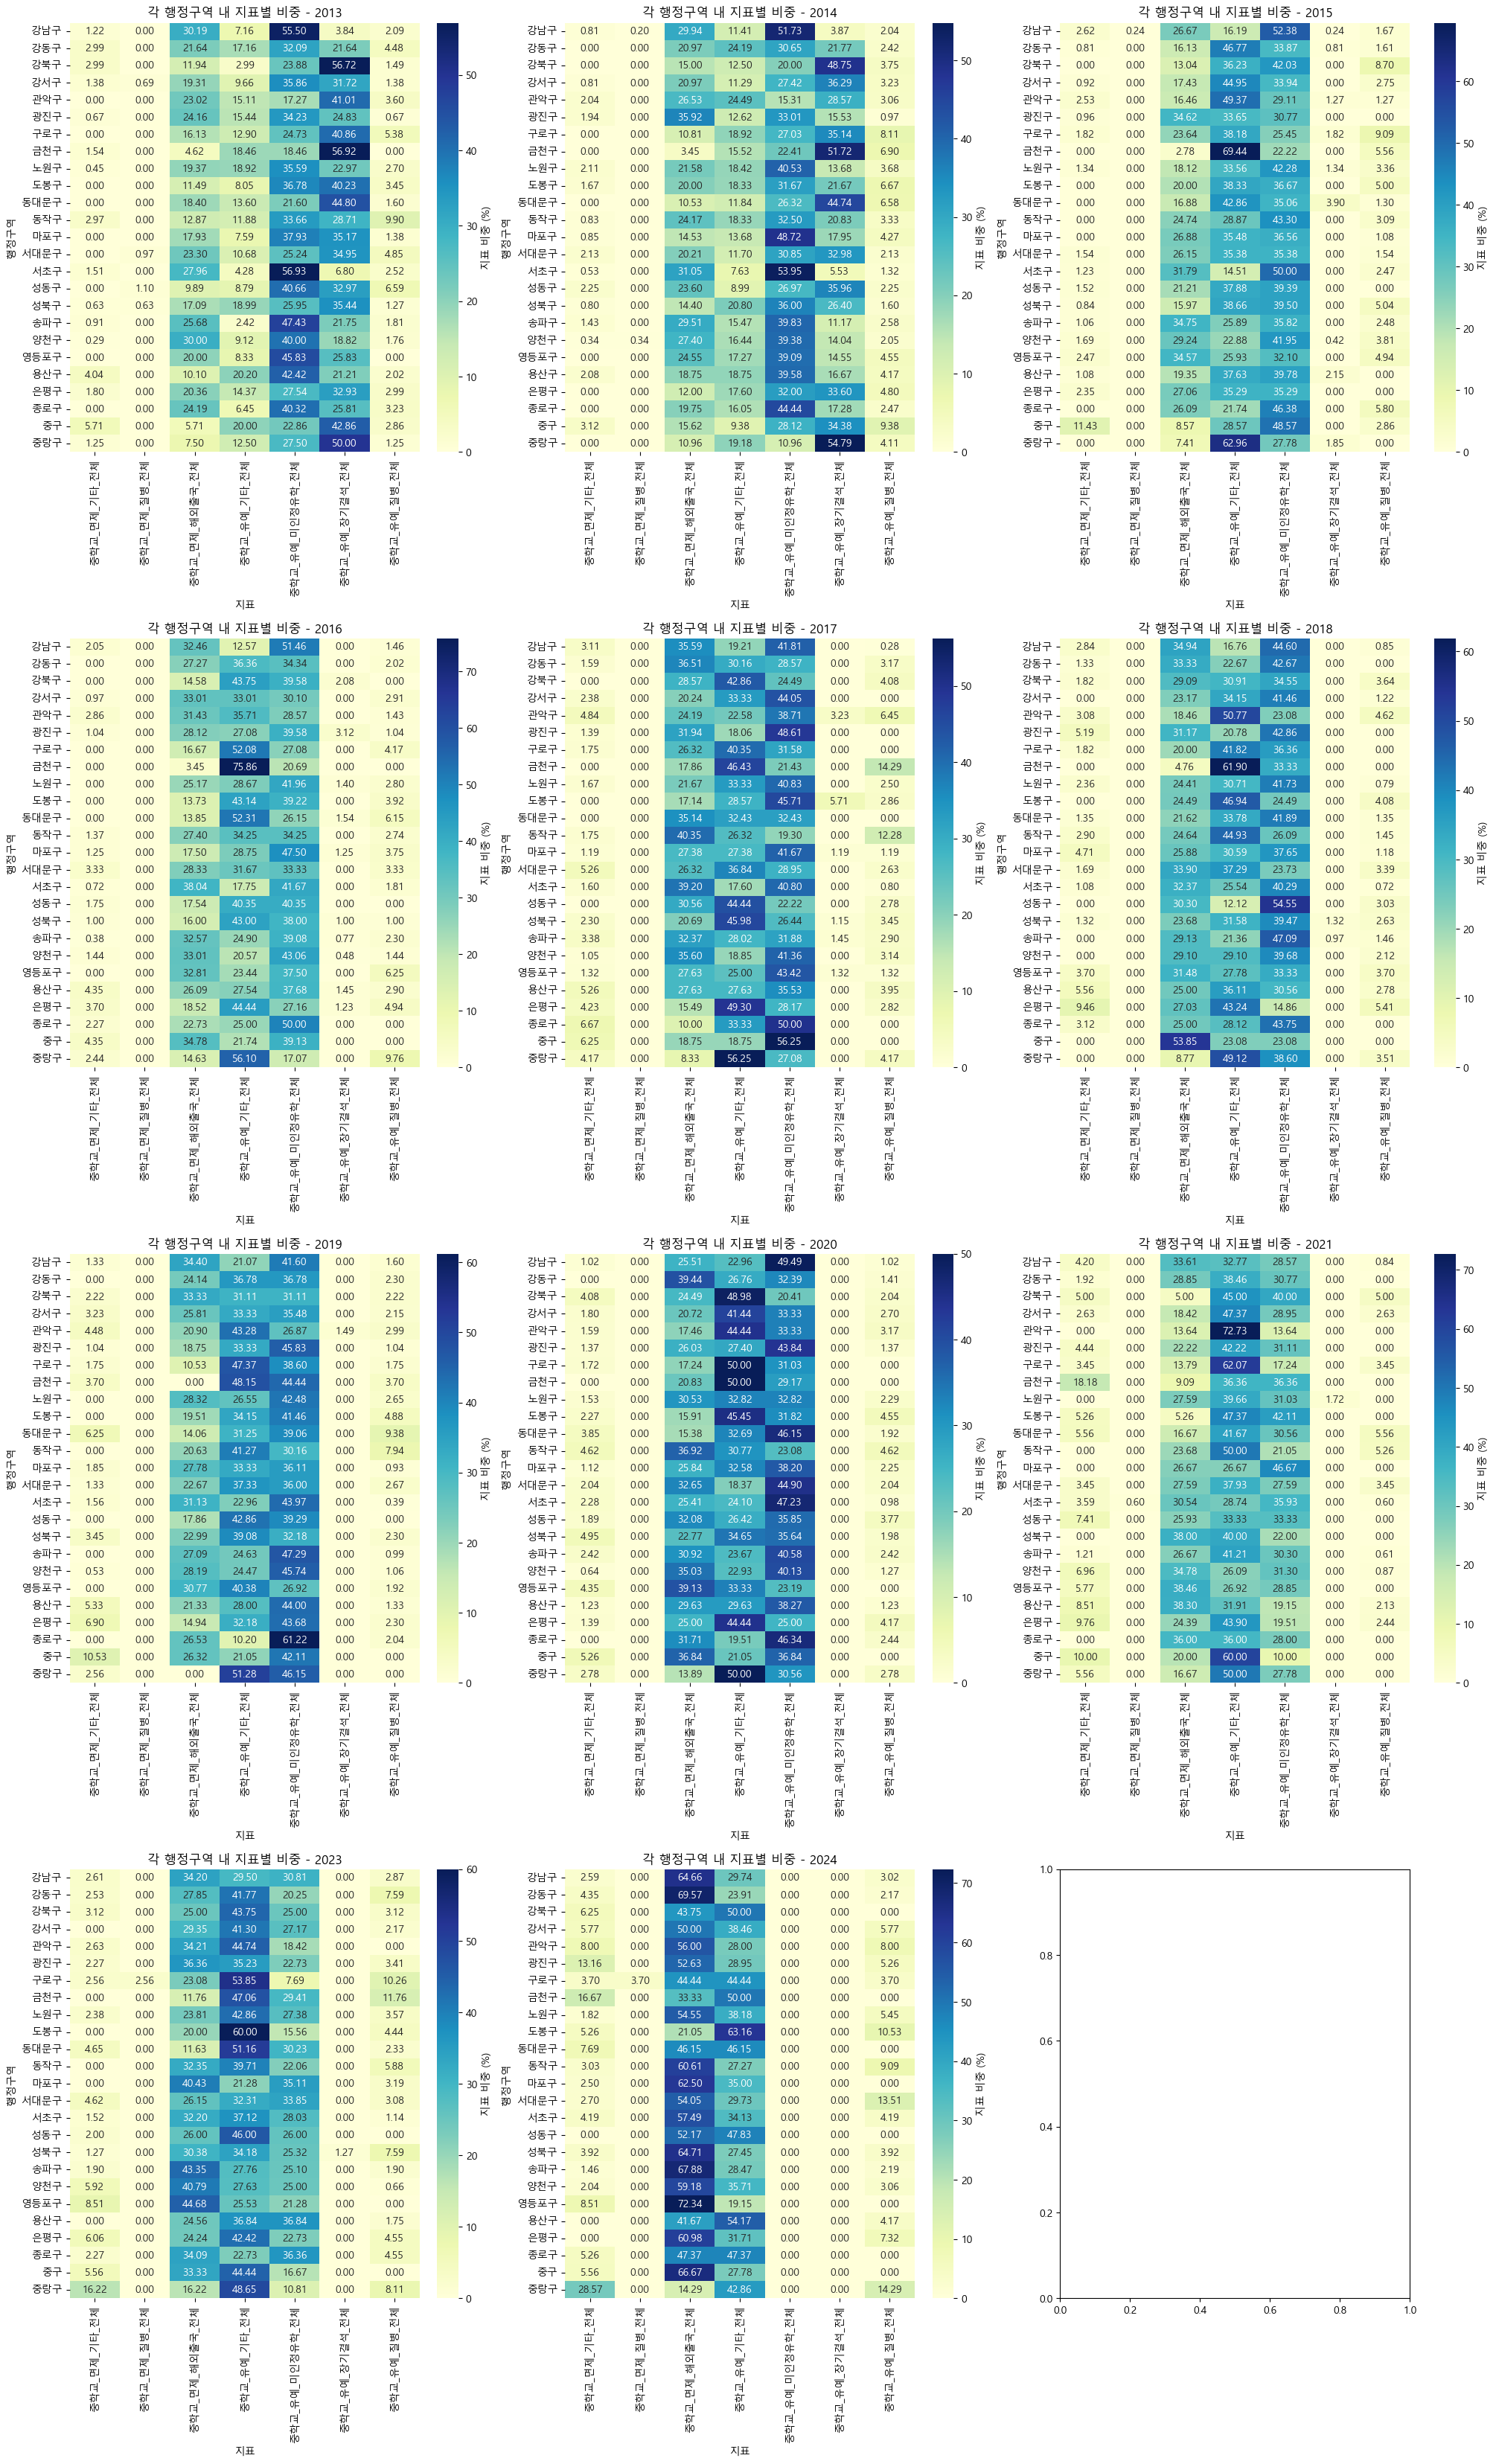

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 이름: df_ms_1
df = df_ms_1.copy()

# 연도 리스트 생성
years = sorted(df['연도'].unique())

# 서브플롯 설정
fig, axes = plt.subplots(len(years) // 3 + 1, 3, figsize=(20, len(years) * 3), constrained_layout=True)
axes = axes.flatten()  # 서브플롯을 인덱싱 쉽게 하기 위해 1D 배열로 변환

for i, year in enumerate(years):
    # 연도별 데이터 추출
    df_year = df[df['연도'] == year].drop(columns=['연도', '행정구역']).set_index(df[df['연도'] == year]['행정구역'])
    
    # 비율 계산
    df_year_percentage = df_year.div(df_year.sum(axis=1), axis=0) * 100  # 행 기준 비율 계산 (%)
    
    # 히트맵 그리기
    sns.heatmap(
        df_year_percentage, 
        annot=True, 
        cmap='YlGnBu', 
        fmt=".2f", 
        ax=axes[i], 
        cbar_kws={'label': '지표 비중 (%)'}
    )
    axes[i].set_title(f'각 행정구역 내 지표별 비중 - {year}')
    axes[i].set_xlabel('지표')
    axes[i].set_ylabel('행정구역')

# 그래프 출력
plt.show()


### 1.2.2 df_ms_2

In [9]:
#df_ms_2 : 행정구역 및 연도별 학업중단자 유형 전체 합계
df_ms_2 = df_ms_all.pivot_table(index=['연도','행정구역'],aggfunc='sum').reset_index()
df_ms_2

연도 행정구역  중학교_면제_기타_여자  중학교_면제_기타_전체  중학교_면제_면제계_여자  중학교_면제_면제계_전체  \
0    2013  강남구           3.0           7.0           82.0          180.0   
1    2013  강동구           0.0           4.0           14.0           33.0   
2    2013  강북구           2.0           2.0            7.0           10.0   
3    2013  강서구           2.0           2.0           17.0           31.0   
4    2013  관악구           0.0           0.0           21.0           32.0   
..    ...  ...           ...           ...            ...            ...   
280  2024  용산구           0.0           0.0            6.0           10.0   
281  2024  은평구           0.0           0.0           17.0           25.0   
282  2024  종로구           0.0           1.0            4.0           10.0   
283  2024   중구           1.0           1.0            8.0           13.0   
284  2024  중랑구           1.0           2.0            2.0            3.0   

     중학교_면제_질병_여자  중학교_면제_질병_전체  중학교_면제_해외출국_여자  중학교_면제_해외출국_전체  ...  \
0             0.0           0.0            79.0           173.0  ...   
1             0.0           0.0            14.0            29.0  ...   
2             0.0           0.0             5.0             8.0  ...   
3             0.0           1.0            15.0            28.0  ...   
4             0.0           0.0            21.0            32.0  ...   
..            ...           ...             ...             ...  ...   
280           0.0           0.0             6.0            10.0  ...   
281           0.0           0.0            17.0            25.0  ...   
282           0.0           0.0             4.0             9.0  ...   
283           0.0           0.0             7.0            12.0  ...   
284           0.0           0.0             1.0             1.0  ...   

     중학교_유예_미인정유학_여자  중학교_유예_미인정유학_전체  중학교_유예_유예계_여자  중학교_유예_유예계_전체  \
0              124.0            318.0          153.0          393.0   
1               21.0             43.0           50.0          101.0   
2               12.0             16.0           35.0           57.0   
3               26.0             52.0           52.0          114.0   
4               11.0             24.0           47.0          107.0   
..               ...              ...            ...            ...   
280              0.0              0.0            9.0           27.0   
281              0.0              0.0           10.0           23.0   
282              0.0              0.0            7.0           11.0   
283              0.0              0.0            3.0           10.0   
284              0.0              0.0            7.0            8.0   

     중학교_유예_장기결석_여자  중학교_유예_장기결석_전체  중학교_유예_질병_여자  중학교_유예_질병_전체  학업중단자_여자  \
0              12.0            22.0           3.0          12.0     235.0   
1              14.0            29.0           3.0           6.0      64.0   
2              21.0            38.0           0.0           1.0      42.0   
3              19.0            46.0           0.0           2.0      69.0   
4              24.0            57.0           4.0           5.0      68.0   
..              ...             ...           ...           ...       ...   
280             0.0             0.0           0.0           1.0      30.0   
281             0.0             0.0           1.0           3.0      36.0   
282             0.0             0.0           0.0           0.0      19.0   
283             0.0             0.0           0.0           0.0      15.0   
284             0.0             0.0           1.0           1.0      13.0   

     학업중단자_전체  
0       573.0  
1       134.0  
2        67.0  
3       145.0  
4       139.0  
..        ...  
280      61.0  
281      64.0  
282      34.0  
283      27.0  
284      16.0  

[285 rows x 22 columns]

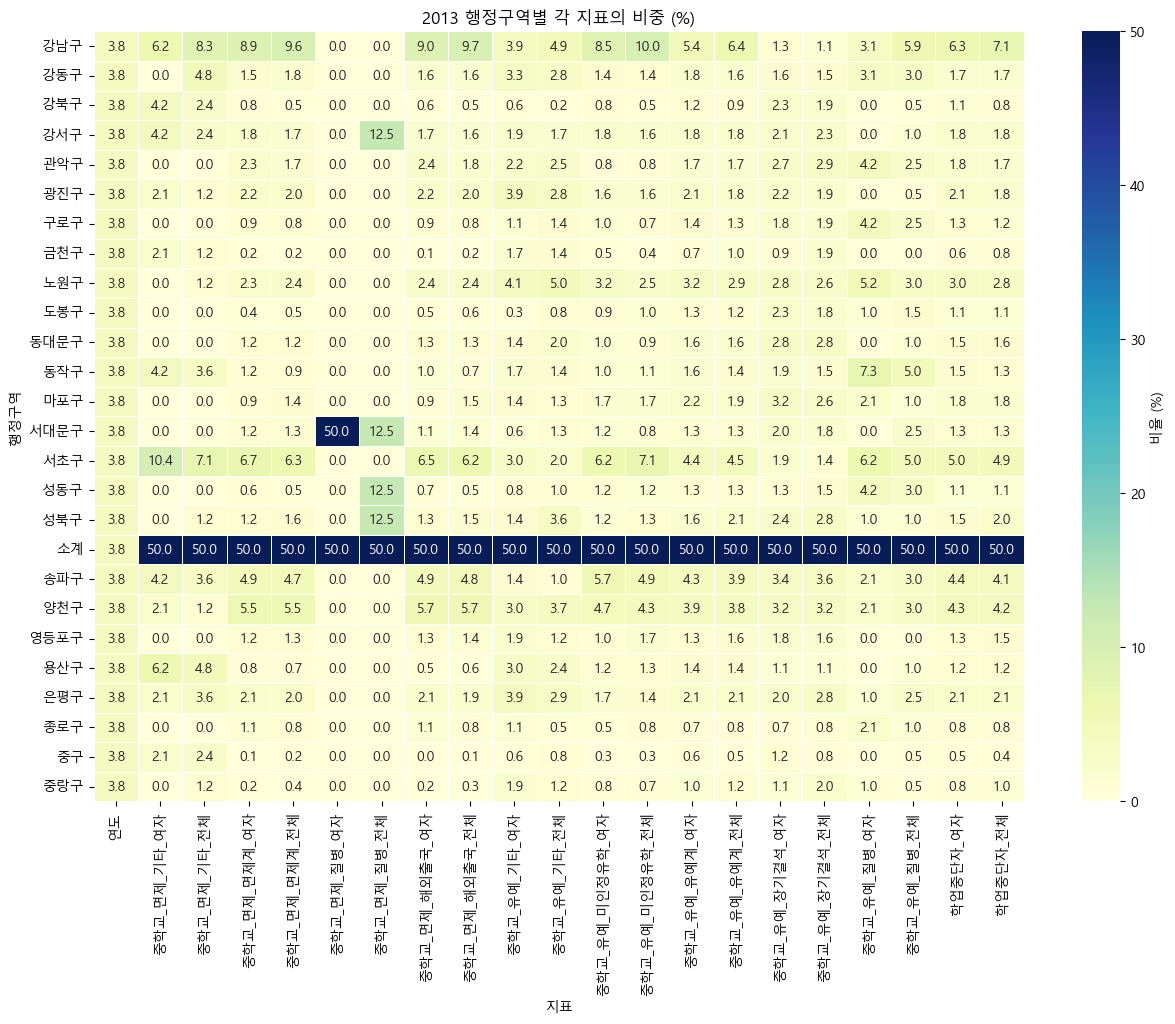

In [10]:
## 예시 코드 생성 2013
cond = (df_ms_2['연도']==2013)
df_ms_13_sum = df_ms_2.loc[cond]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 예시: df 비율 계산 (각 열에 대해 전체 합 대비 비율)
df_percentage = df_ms_13_sum.set_index('행정구역')  # '행정구역'을 인덱스로 설정
df_percentage = df_percentage.div(df_percentage.sum(axis=0), axis=1) * 100  # 각 열에 대해 비율 계산 (%)

## 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(df_percentage, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': '비율 (%)'})
plt.title("2013 행정구역별 각 지표의 비중 (%)")
plt.xlabel("지표")
plt.ylabel("행정구역")
plt.show()


# 2. 고등학교
## 2.1 고등학교 연도별 생성(df_20xx_hs)

In [14]:
# 데이터셋과 이름 리스트
datasets = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]
dataset_names = ['df_2013_hs', 'df_2014_hs', 'df_2015_hs', 'df_2016_hs', 'df_2017_hs',
                 'df_2018_hs', 'df_2019_hs', 'df_2020_hs', 'df_2021_hs', 'df_2022_hs', 'df_2023_hs', 'df_2024_hs']

for df, name in zip(datasets, dataset_names):
    
    if '학제_학년도기준' in df.columns:
        df = df.rename(columns={'학제_학년도기준': '학제'})
        
    # '시도', '행정구역' 열과 '고등학교'로 시작하는 열만 선택
    df_hs = pd.concat([df[['시도', '행정구역','학제','연도']], 
                       df.filter(regex='^고등학교')], axis=1)
    
    # 처리된 데이터프레임을 원래 이름으로 동적 할당
    globals()[name] = df_hs 
    
    print(f"Processed dataset: {name}")

Processed dataset: df_2013_hs
Processed dataset: df_2014_hs
Processed dataset: df_2015_hs
Processed dataset: df_2016_hs
Processed dataset: df_2017_hs
Processed dataset: df_2018_hs
Processed dataset: df_2019_hs
Processed dataset: df_2020_hs
Processed dataset: df_2021_hs
Processed dataset: df_2022_hs
Processed dataset: df_2023_hs
Processed dataset: df_2024_hs


## 2.2 df_hs_all : 고등학교 전체 합친 테이블 생성
- *'시도'나 '학제'가 삭제되어 있지는 않음

In [15]:
common_columns = df_2013_hs.columns  # 첫 번째 데이터프레임의 열을 공통 열로 설정

# 모든 데이터프레임의 중복 열을 제거한 후 concat 수행
tables = [df.loc[:, ~df.columns.duplicated()].reindex(columns=common_columns).reset_index(drop=True) for df in [
    df_2013_hs, df_2014_hs, df_2015_hs, df_2016_hs, df_2017_hs,
    df_2018_hs, df_2019_hs, df_2020_hs, df_2021_hs, df_2022_hs,
    df_2023_hs, df_2024_hs
]]

# 모든 데이터프레임을 행 방향으로 합치기
df_hs_all = pd.concat(tables, ignore_index=True)

# 고등학교 학제의 () 삭제
df_hs_all['학제'] = df_hs_all['학제'].str.replace(r"[()]", "", regex=True)

# 시도 삭제
df_hs_all.drop(columns=['시도'], inplace=True)

# 불필요한 학제 
cond1 = df_hs_all['학제'] != '중학교'
cond2 = df_hs_all['학제'] != '소계'
cond3 = df_hs_all['학제'] != '전체'
cond4 = df_hs_all['학제'] != '고등학교'
df_hs_all= df_hs_all.loc[cond1&cond2&cond3&cond4]

In [16]:
df_hs_all

행정구역    학제    연도  고등학교_유예_유예계_전체  고등학교_유예_유예계_여자  고등학교_면제_면제계_전체  \
2     종로구   일반고  2013             0.0             0.0             0.0   
3     종로구   특목고  2013             0.0             0.0             0.0   
4     종로구  특성화고  2013             0.0             0.0             0.0   
5     종로구   자율고  2013             0.0             0.0             0.0   
9      중구   일반고  2013             0.0             0.0             0.0   
...   ...   ...   ...             ...             ...             ...   
1988  송파구   자율고  2024             0.0             0.0             0.0   
1992  강동구   일반고  2024             1.0             0.0             0.0   
1993  강동구   특목고  2024             0.0             0.0             0.0   
1994  강동구  특성화고  2024             0.0             0.0             0.0   
1995  강동구   자율고  2024             0.0             0.0             0.0   

      고등학교_면제_면제계_여자  고등학교_자퇴_자퇴계_전체  고등학교_자퇴_자퇴계_여자  고등학교_자퇴_질병_전체  ...  \
2                0.0           150.0            72.0            5.0  ...   
3                0.0            24.0            18.0            0.0  ...   
4                0.0            30.0            20.0            0.0  ...   
5                0.0            26.0             0.0            1.0  ...   
9                0.0            41.0             8.0            3.0  ...   
...              ...             ...             ...            ...  ...   
1988             0.0            12.0             0.0            2.0  ...   
1992             0.0           124.0            63.0           14.0  ...   
1993             0.0             4.0             3.0            1.0  ...   
1994             0.0            43.0            21.0            0.0  ...   
1995             0.0             8.0             0.0            0.0  ...   

      고등학교_자퇴_기타_전체  고등학교_자퇴_기타_여자  고등학교_퇴학_퇴학계_전체  고등학교_퇴학_퇴학계_여자  \
2              32.0            9.0             6.0             1.0   
3               1.0            1.0             0.0             0.0   
4               8.0            2.0             2.0             1.0   
5               0.0            0.0             0.0             0.0   
9              15.0            2.0             1.0             0.0   
...             ...            ...             ...             ...   
1988            5.0            0.0             0.0             0.0   
1992           83.0           40.0             0.0             0.0   
1993            1.0            0.0             0.0             0.0   
1994           19.0            9.0             0.0             0.0   
1995            7.0            0.0             0.0             0.0   

      고등학교_퇴학_학교폭력위원회_전체  고등학교_퇴학_학교폭력위원회_여자  고등학교_퇴학_학칙위반에따른징계_전체  \
2                    0.0                 0.0                   6.0   
3                    0.0                 0.0                   0.0   
4                    0.0                 0.0                   2.0   
5                    0.0                 0.0                   0.0   
9                    0.0                 0.0                   1.0   
...                  ...                 ...                   ...   
1988                 0.0                 0.0                   0.0   
1992                 0.0                 0.0                   0.0   
1993                 0.0                 0.0                   0.0   
1994                 0.0                 0.0                   0.0   
1995                 0.0                 0.0                   0.0   

      고등학교_퇴학_학칙위반에따른징계_여자  고등학교_제적_제적계_전체  고등학교_제적_제적계_여자  
2                      1.0             0.0             0.0  
3                      0.0             0.0             0.0  
4                      1.0             0.0             0.0  
5                      0.0             0.0             0.0  
9                      0.0             0.0             0.0  
...                    ...             ...             ...  
1988                   0.0             0.0             0.0  
1992                   0.0             0.0   

### 2.2.1 df_hs_1 (고등학교 디폴트열만 추출한 테이블)

In [20]:
df_hs_1 = df_hs_all.pivot_table(index=['연도','행정구역'], values=['고등학교_유예_유예계_전체','고등학교_면제_면제계_전체','고등학교_자퇴_질병_전체', '고등학교_자퇴_가사_전체','고등학교_자퇴_부적응_학업관련_전체','고등학교_자퇴_부적응_대인관계_전체','고등학교_자퇴_부적응_학교규칙_전체','고등학교_자퇴_부적응_기타_전체','고등학교_자퇴_해외출국_전체','고등학교_자퇴_기타_전체','고등학교_퇴학_학교폭력위원회_전체','고등학교_퇴학_학칙위반에따른징계_전체','고등학교_제적_제적계_전체'],aggfunc='sum').reset_index()
df_hs_1.to_csv('hs_default_col.csv', encoding = 'cp949')

# 3. 고등학교 구별 특징확인

## 3.4 (예시) 2023 구별 원인 확인하기

In [19]:
cond = (df_hs_1['연도']==2023)
hs_2023 = df_hs_1.loc[cond]
hs_2023 = hs_2023.pivot_table(index='행정구역', aggfunc='sum').reset_index()
hs_2023.drop(columns=['연도'],inplace=True)
hs_2023 = hs_2023.loc[(hs_2023['행정구역']!='소계')]
hs_2023


행정구역  고등학교_면제_면제계_전체  고등학교_유예_유예계_전체  고등학교_자퇴_가사_전체  고등학교_자퇴_기타_전체  \
0    강남구             0.0             0.0            0.0          208.0   
1    강동구             0.0             0.0            0.0           92.0   
2    강북구             0.0             0.0            0.0           59.0   
3    강서구             0.0             0.0            1.0          210.0   
4    관악구             1.0             0.0            0.0          110.0   
5    광진구             0.0             0.0            0.0           60.0   
6    구로구             0.0             0.0            2.0           91.0   
7    금천구             0.0             0.0            0.0           37.0   
8    노원구             0.0             0.0            0.0          210.0   
9    도봉구             0.0             0.0            1.0           67.0   
10  동대문구             0.0             0.0            1.0           89.0   
11   동작구             0.0             1.0            0.0           57.0   
12   마포구             0.0             0.0            1.0           94.0   
13  서대문구             0.0             0.0            0.0           34.0   
14   서초구             0.0             1.0            0.0           94.0   
15   성동구             0.0             0.0            0.0           40.0   
16   성북구             0.0             0.0            0.0           49.0   
18   송파구             0.0             0.0            0.0          179.0   
19   양천구             0.0             0.0            0.0          115.0   
20  영등포구             0.0             0.0            0.0           46.0   
21   용산구             0.0             1.0            0.0           58.0   
22   은평구             0.0             0.0            0.0          121.0   
23   종로구             0.0             0.0            0.0           75.0   
24    중구             0.0             0.0            1.0           78.0   
25   중랑구             0.0             1.0            0.0           69.0   

    고등학교_자퇴_부적응_기타_전체  고등학교_자퇴_부적응_대인관계_전체  고등학교_자퇴_부적응_학교규칙_전체  \
0                 6.0                  0.0                  1.0   
1                25.0                  0.0                  1.0   
2                 4.0                  0.0                  0.0   
3                25.0                  1.0                  0.0   
4                23.0                  1.0                  4.0   
5                 4.0                  1.0                  1.0   
6                15.0                  1.0                  1.0   
7                 9.0                  2.0                  2.0   
8                39.0                  2.0                  7.0   
9                 8.0                  2.0                  2.0   
10                8.0                  0.0                  1.0   
11               40.0                  1.0                  1.0   
12                6.0                  1.0                  1.0   
13                4.0                  0.0                  0.0   
14                5.0                  1.0                  1.0   
15                5.0                  1.0                  2.0   
16                7.0                  0.0                  3.0   
18               17.0                  5.0                  1.0   
19               20.0                  0.0                  0.0   
20               10.0                  0.0                  0.0   
21                4.0                  0.0                  0.0   
22               25.0                  1.0                  1.0   
23                6.0                  2.0                  3.0   
24               30.0                  1.0                  4.0   
25                3.0                  0.0                  1.0   

    고등학교_자퇴_부적응_학업관련_전체  고등학교_자퇴_질병_전체  고등학교_자퇴_해외출국_전체  고등학교_제적_제적계_전체  \
0                   3.0            6.0            109.0             0.0   
1                   6.0           18.0             29.0             0.0   
2                   0.0            5.0             12.0             0.0   
3                  23.0           13

In [ ]:
fig = px.bar(region_percentages, x = 'Arrived Destination Resolved', y='Number of Handovers', template = 'seaborn')   
fig.update_traces(marker_color='#264653')   
fig.update_layout(title_text="Number of Completed Handovers by Hour",title_x=0,margin= dict(l=0,r=10,b=10,t=30), yaxis_title=None, xaxis_title=None)    
g1.plotly_chart(fig, use_container_width=True) 

In [32]:
# 행정구역별 총합을 계산
region_sums = hs_2023.groupby('행정구역').sum()

# 전체 합을 구함
total_sum = region_sums.sum().sum()

# 행정구역별 비중을 계산
region_percentages = (region_sums.sum(axis=1) / total_sum) * 100

# 계산된 비율을 데이터프레임에 추가
region_sums['region_percentages'] = region_percentages

# 결과 확인
print(region_sums)


      고등학교_면제_면제계_전체  고등학교_유예_유예계_전체  고등학교_자퇴_가사_전체  고등학교_자퇴_기타_전체  \
행정구역                                                                 
강남구              0.0             0.0            0.0          208.0   
강동구              0.0             0.0            0.0           92.0   
강북구              0.0             0.0            0.0           59.0   
강서구              0.0             0.0            1.0          210.0   
관악구              1.0             0.0            0.0          110.0   
광진구              0.0             0.0            0.0           60.0   
구로구              0.0             0.0            2.0           91.0   
금천구              0.0             0.0            0.0           37.0   
노원구              0.0             0.0            0.0          210.0   
도봉구              0.0             0.0            1.0           67.0   
동대문구             0.0             0.0            1.0           89.0   
동작구              0.0             1.0            0.0           57.0   
마포구              0.0

In [33]:
region_sums

고등학교_면제_면제계_전체  고등학교_유예_유예계_전체  고등학교_자퇴_가사_전체  고등학교_자퇴_기타_전체  \
행정구역                                                                 
강남구              0.0             0.0            0.0          208.0   
강동구              0.0             0.0            0.0           92.0   
강북구              0.0             0.0            0.0           59.0   
강서구              0.0             0.0            1.0          210.0   
관악구              1.0             0.0            0.0          110.0   
광진구              0.0             0.0            0.0           60.0   
구로구              0.0             0.0            2.0           91.0   
금천구              0.0             0.0            0.0           37.0   
노원구              0.0             0.0            0.0          210.0   
도봉구              0.0             0.0            1.0           67.0   
동대문구             0.0             0.0            1.0           89.0   
동작구              0.0             1.0            0.0           57.0   
마포구              0.0             0.0            1.0           94.0   
서대문구             0.0             0.0            0.0           34.0   
서초구              0.0             1.0            0.0           94.0   
성동구              0.0             0.0            0.0           40.0   
성북구              0.0             0.0            0.0           49.0   
송파구              0.0             0.0            0.0          179.0   
양천구              0.0             0.0            0.0          115.0   
영등포구             0.0             0.0            0.0           46.0   
용산구              0.0             1.0            0.0           58.0   
은평구              0.0             0.0            0.0          121.0   
종로구              0.0             0.0            0.0           75.0   
중구               0.0             0.0            1.0           78.0   
중랑구              0.0             1.0            0.0           69.0   

      고등학교_자퇴_부적응_기타_전체  고등학교_자퇴_부적응_대인관계_전체  고등학교_자퇴_부적응_학교규칙_전체  \
행정구역                                                                
강남구                 6.0                  0.0                  1.0   
강동구                25.0                  0.0                  1.0   
강북구                 4.0                  0.0                  0.0   
강서구                25.0                  1.0                  0.0   
관악구                23.0                  1.0                  4.0   
광진구                 4.0                  1.0                  1.0   
구로구                15.0                  1.0                  1.0   
금천구                 9.0                  2.0                  2.0   
노원구                39.0                  2.0                  7.0   
도봉구                 8.0                  2.0                  2.0   
동대문구                8.0                  0.0                  1.0   
동작구                40.0                  1.0                  1.0   
마포구                 6.0                  1.0                  1.0   
서대문구                4.0                  0.0                  0.0   
서초구                 5.0                  1.0                  1.0   
성동구                 5.0                  1.0                  2.0   
성북구                 7.0                  0.0                  3.0   
송파구                17.0                  5.0                  1.0   
양천구                20.0                  0.0                  0.0   
영등포구               10.0                  0.0                  0.0   
용산구                 4.0                  0.0                  0.0   
은평구                25.0                  1.0                  1.0   
종로구                 6.0                  2.0                  3.0   
중구                 30.0                  1.0                  4.0   
중랑구                 3.0                  0.0                  1.0   

      고등학교_자퇴_부적응_학업관련_전체  고등학교_자퇴_질병_전체  고등학교_자퇴_해외출국_전체  고등학교_제적_제적계_전체  \
행정구역                                                                        
강남구                   3.0            6.0            109.0             0.0   
강동구                 

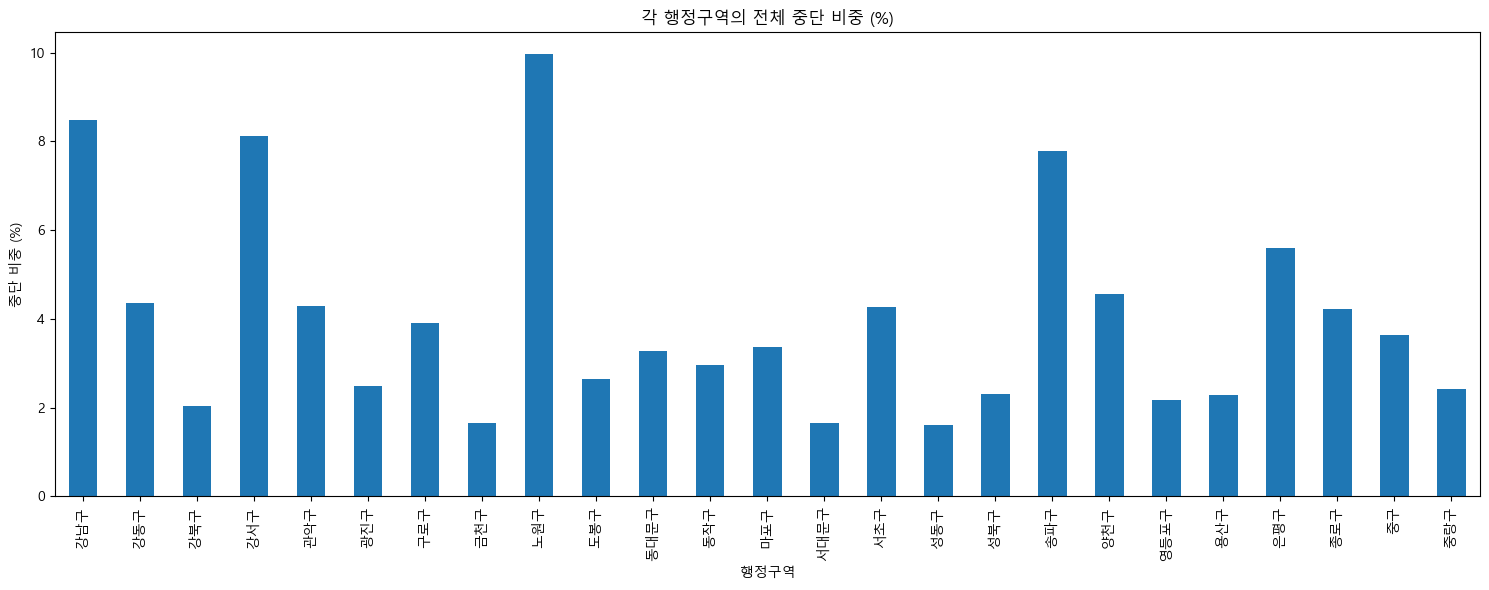

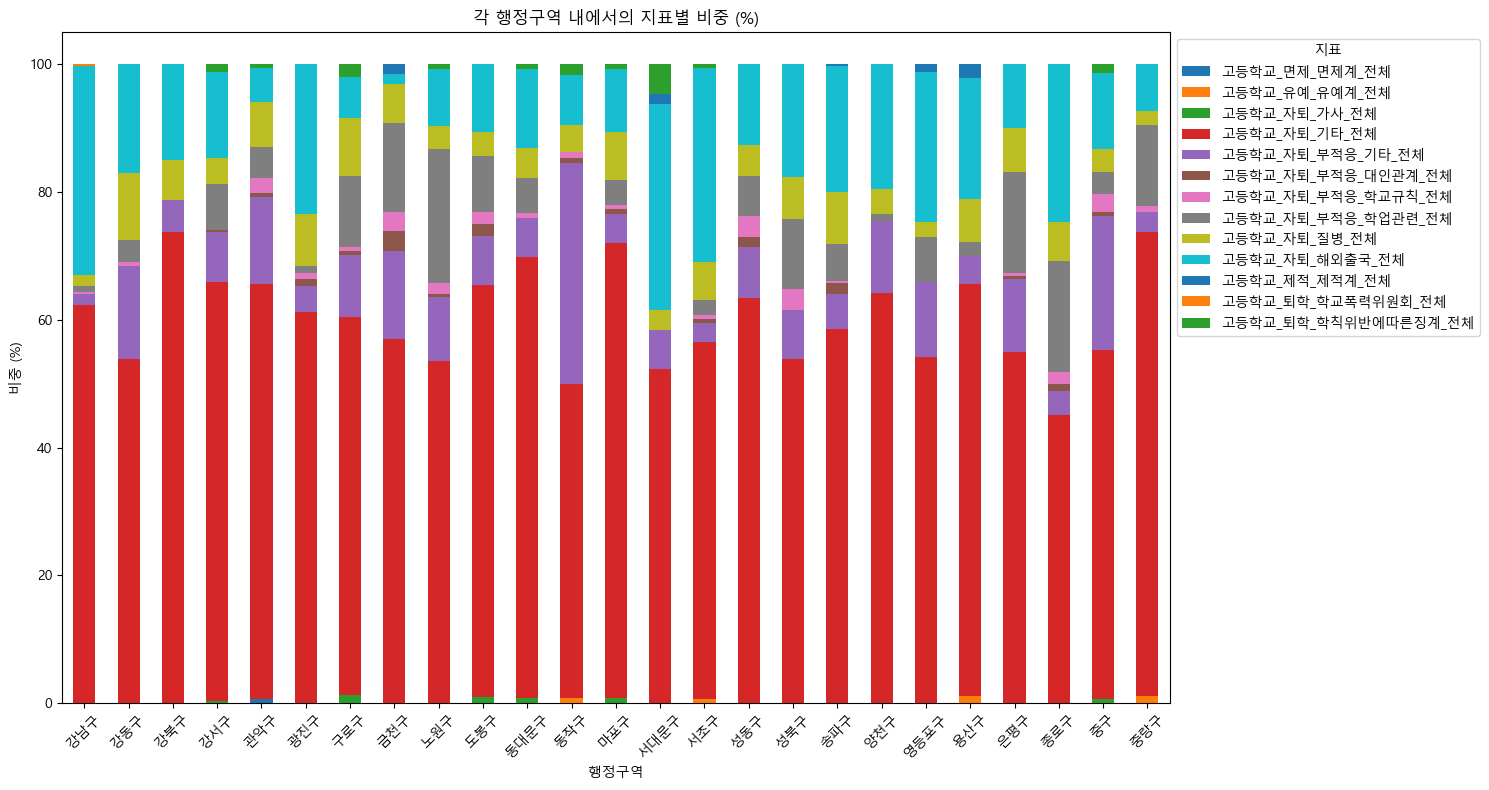

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 각 행정구역이 전체에서 차지하는 비중 시각화
# '행정구역' 기준으로 각 컬럼의 총합 구하기
region_sums = hs_2023.groupby('행정구역').sum()

# 행정구역별 총합을 전체 합으로 나누어 비중 계산
total_sum = region_sums.sum().sum()
region_percentages = (region_sums.sum(axis=1) / total_sum) * 100


# 그래프 생성
plt.figure(figsize=(15, 6))
region_percentages.plot(kind='bar')
plt.title('각 행정구역의 전체 중단 비중 (%)')
plt.xlabel('행정구역')
plt.ylabel('중단 비중 (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. 각 행정구역 안에서 특정 지표의 비중 시각화
# 각 행정구역별로 지표에 대한 비율 계산
region_factors = region_sums.div(region_sums.sum(axis=1), axis=0) * 100

# 스택된 막대 그래프로 행정구역별 지표 비중 시각화
region_factors.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('각 행정구역 내에서의 지표별 비중 (%)')
plt.xlabel('행정구역')
plt.ylabel('비중 (%)')
plt.xticks(rotation=45)
plt.legend(title='지표', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


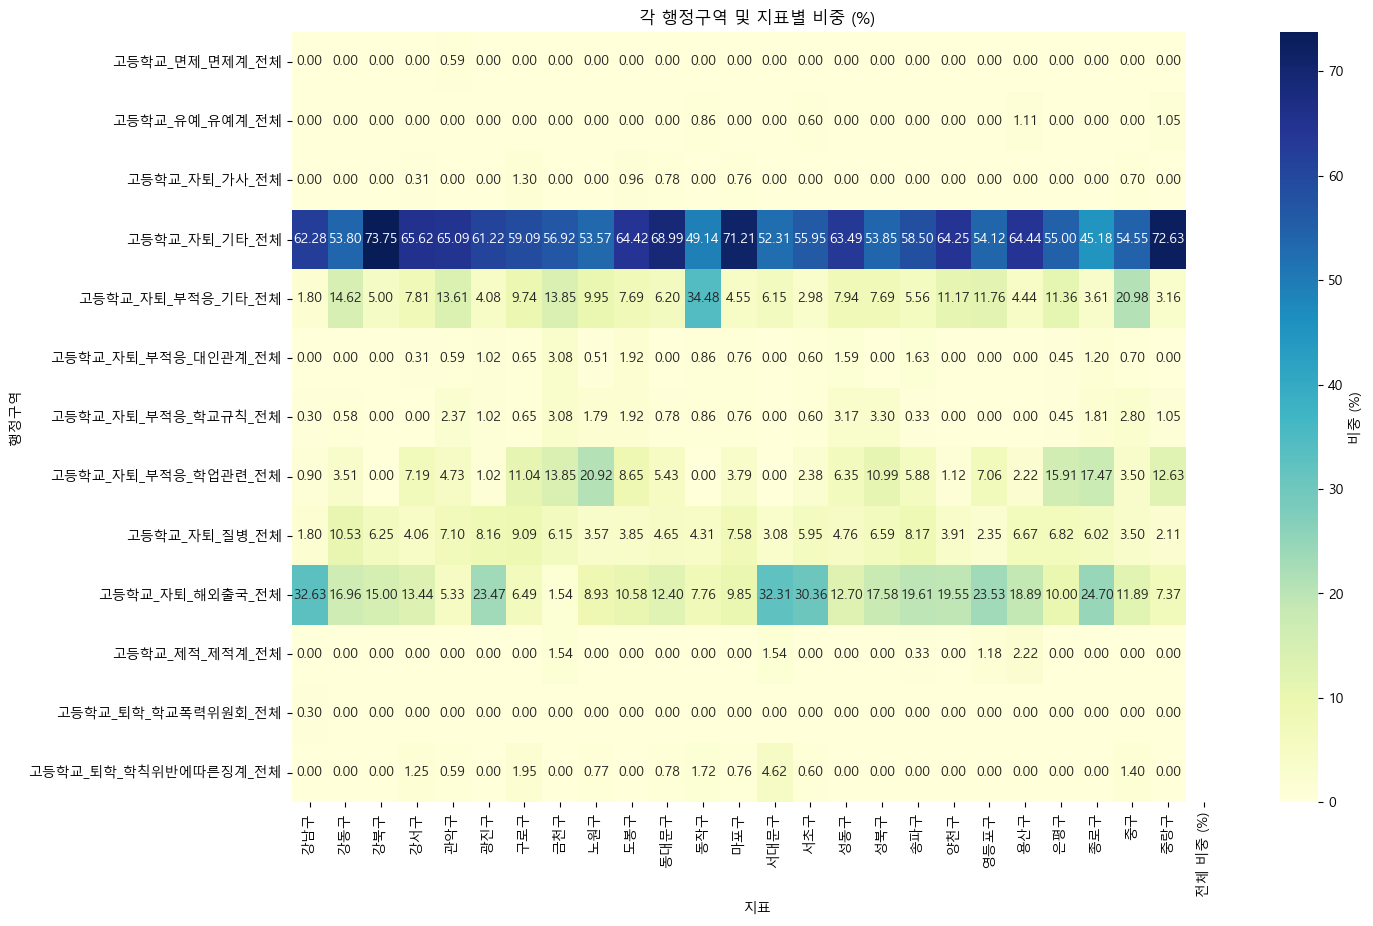

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 각 행정구역이 전체에서 차지하는 비중 계산
region_sums = hs_2023.groupby('행정구역').sum()

# 행정구역별 총합을 전체 합으로 나누어 비중 계산
total_sum = region_sums.sum().sum()
region_percentages = (region_sums.sum(axis=1) / total_sum) * 100

# 2. 각 행정구역 안에서 지표별 비중 계산
region_factors = region_sums.div(region_sums.sum(axis=1), axis=0) * 100

# 3. 총 비중 데이터를 데이터프레임으로 변환하고 각 행정구역에 추가
region_factors.loc['전체 비중 (%)'] = region_percentages

# 히트맵 생성
plt.figure(figsize=(15, 10))
sns.heatmap(region_factors.T, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': '비중 (%)'})
plt.title('각 행정구역 및 지표별 비중 (%)')
plt.xlabel('지표')
plt.ylabel('행정구역')
plt.show()



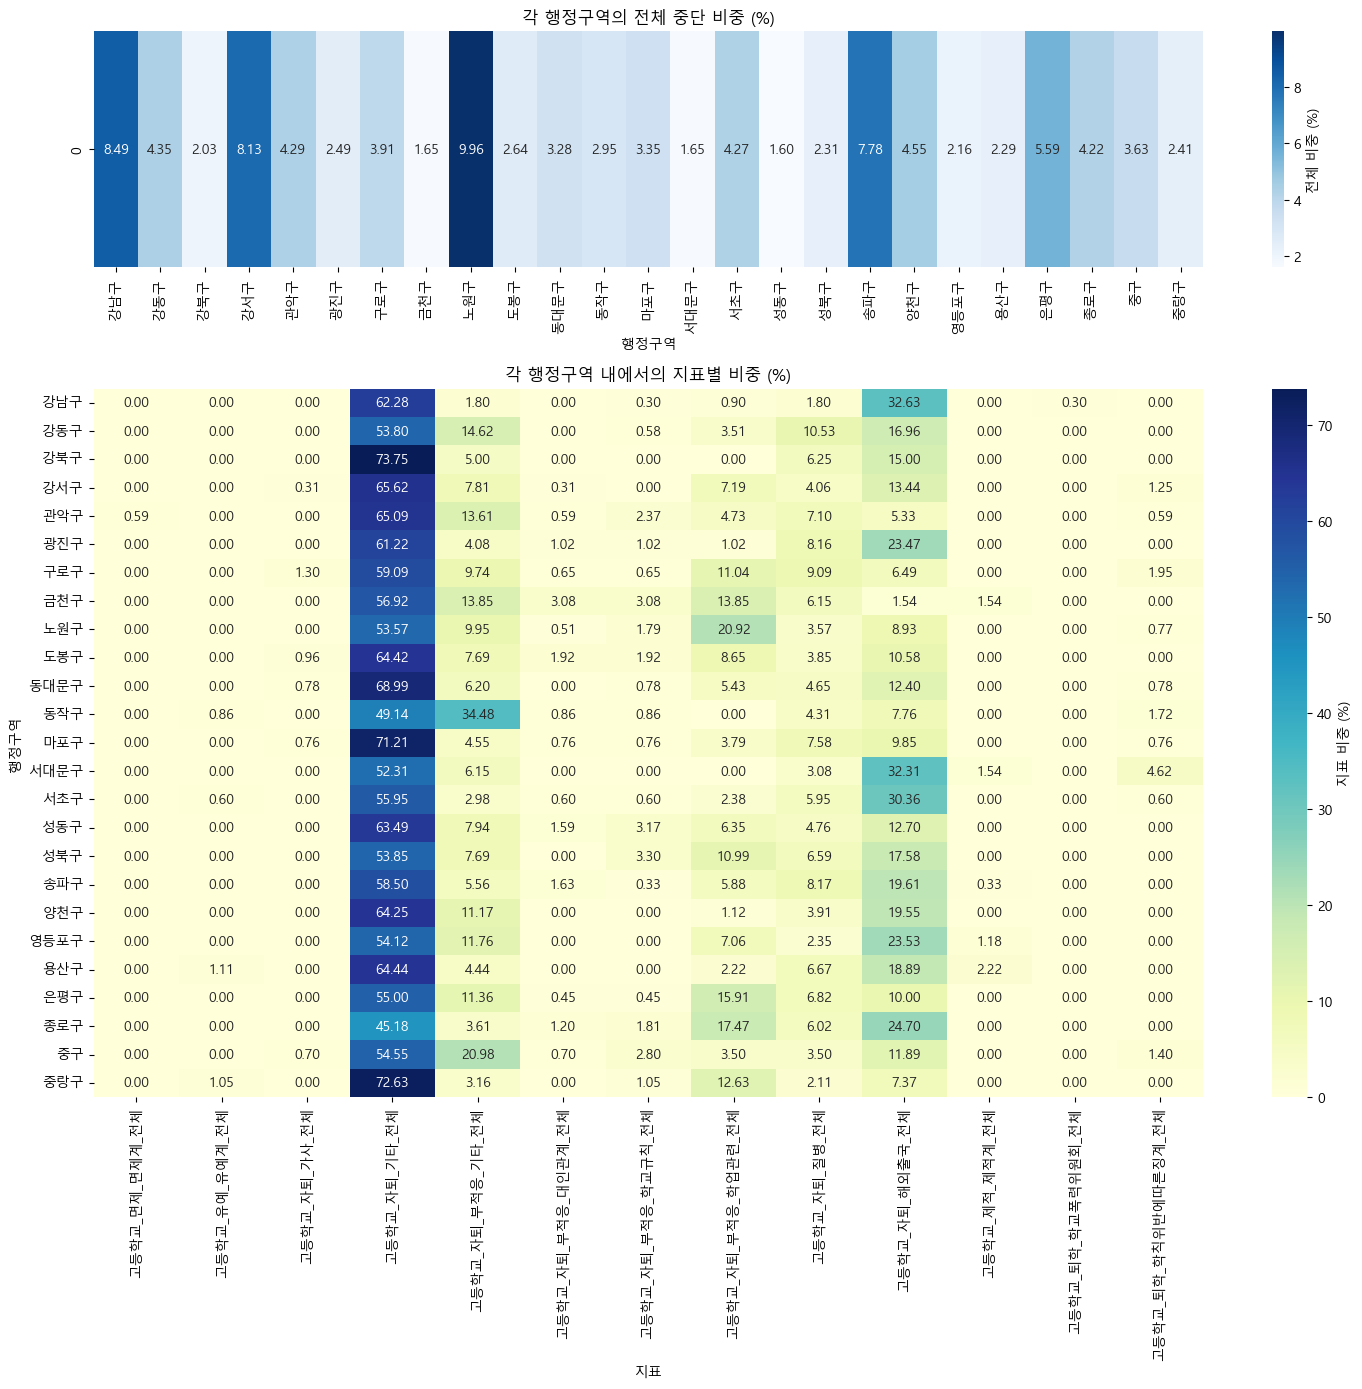

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 각 행정구역이 전체에서 차지하는 비중 계산
region_sums = hs_2023.groupby('행정구역').sum()
total_sum = region_sums.sum().sum()
region_percentages = (region_sums.sum(axis=1) / total_sum) * 100

# 2. 각 행정구역 내에서의 지표별 비중 계산
region_factors = region_sums.div(region_sums.sum(axis=1), axis=0) * 100

# 히트맵 그리기
fig, axes = plt.subplots(2, 1, figsize=(15, 14), gridspec_kw={'height_ratios': [1, 3]})

# 3. 첫 번째 히트맵: 각 행정구역의 전체 비중
sns.heatmap(region_percentages.to_frame().T, annot=True, cmap='Blues', fmt=".2f", ax=axes[0], cbar_kws={'label': '전체 비중 (%)'})
axes[0].set_title('각 행정구역의 전체 중단 비중 (%)')
axes[0].set_xlabel('행정구역')
axes[0].set_ylabel('')

# 4. 두 번째 히트맵: 각 행정구역 내에서의 지표별 비중
sns.heatmap(region_factors, annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[1], cbar_kws={'label': '지표 비중 (%)'})
axes[1].set_title('각 행정구역 내에서의 지표별 비중 (%)')
axes[1].set_xlabel('지표')
axes[1].set_ylabel('행정구역')

plt.tight_layout()
plt.show()


df_hs_1.pivot_table(ind)
위의 그래프는 어떤 요인이 두드러지는지 한눈에 파악하기 좋다 그래서 꼭 쓰는게 좋을듯 연도별로 다 보면 좋을 것 같다

In [19]:
k = df_hs_1.pivot_table(index=['연도','행정구역'], aggfunc='sum').reset_index()
k

연도 행정구역  고등학교_면제_면제계_전체  고등학교_유예_유예계_전체  고등학교_자퇴_가사_전체  고등학교_자퇴_기타_전체  \
0    2013  강남구             1.0             2.0           20.0          102.0   
1    2013  강동구             0.0             3.0           13.0           56.0   
2    2013  강북구             0.0             0.0            1.0           28.0   
3    2013  강서구             0.0             4.0           72.0           68.0   
4    2013  관악구             0.0             2.0           13.0           76.0   
..    ...  ...             ...             ...            ...            ...   
306  2024  용산구             0.0             0.0            0.0           50.0   
307  2024  은평구             0.0             0.0            2.0          153.0   
308  2024  종로구             0.0             0.0            0.0           83.0   
309  2024   중구             0.0             0.0            0.0           76.0   
310  2024  중랑구             0.0             0.0            1.0           59.0   

     고등학교_자퇴_부적응_기타_전체  고등학교_자퇴_부적응_대인관계_전체  고등학교_자퇴_부적응_학교규칙_전체  \
0                 51.0                  2.0                 23.0   
1                122.0                  2.0                 24.0   
2                 23.0                  0.0                 27.0   
3                 53.0                 13.0                 14.0   
4                 77.0                  0.0                  0.0   
..                 ...                  ...                  ...   
306                0.0                  0.0                  0.0   
307                0.0                  0.0                  0.0   
308                0.0                  0.0                  0.0   
309                0.0                  0.0                  0.0   
310                0.0                  0.0                  0.0   

     고등학교_자퇴_부적응_학업관련_전체  고등학교_자퇴_질병_전체  고등학교_자퇴_해외출국_전체  고등학교_제적_제적계_전체  \
0                   45.0           28.0            342.0             0.0   
1                   29.0           20.0             54.0             0.0   
2                   28.0           14.0              8.0             0.0   
3                  250.0           23.0             74.0             0.0   
4                   28.0           17.0             23.0             0.0   
..                   ...            ...              ...             ...   
306                  0.0            4.0             22.0             0.0   
307                  0.0           14.0             21.0             0.0   
308                  0.0           15.0             48.0             0.0   
309                  0.0           19.0             19.0             0.0   
310                  0.0            7.0              2.0             0.0   

     고등학교_퇴학_학교폭력위원회_전체  고등학교_퇴학_학칙위반에따른징계_전체  
0                   5.0                   1.0  
1                   0.0                  13.0  
2                   2.0                   3.0  
3                   1.0                  28.0  
4                   2.0                   4.0  
..                  ...                   ...  
306                 0.0                   0.0  
307                 0.0                   3.0  
308                 0.0                   0.0  
309                 0.0                   2.0  
310                 0.0                   0.0  

[311 rows x 15 columns]

In [20]:
cond = df_hs_1['연도'] == 2013
hs_2013 = df_hs_1.loc[cond]
hs_2013 = hs_2013.pivot_table(index='행정구역', values=['고등학교_자퇴_가사_전체','고등학교_자퇴_기타_전체','고등학교_자퇴_부적응_기타_전체','고등학교_자퇴_부적응_대인관계_전체','고등학교_자퇴_부적응_학교규칙_전체','고등학교_자퇴_부적응_학업관련_전체','고등학교_자퇴_질병_전체','고등학교_자퇴_해외출국_전체'],aggfunc='sum').reset_index()
hs_2013

행정구역  고등학교_자퇴_가사_전체  고등학교_자퇴_기타_전체  고등학교_자퇴_부적응_기타_전체  \
0    강남구           20.0          102.0               51.0   
1    강동구           13.0           56.0              122.0   
2    강북구            1.0           28.0               23.0   
3    강서구           72.0           68.0               53.0   
4    관악구           13.0           76.0               77.0   
5    광진구           17.0           33.0               19.0   
6    구로구           20.0           40.0               95.0   
7    금천구           17.0           21.0                4.0   
8    노원구           69.0          127.0               84.0   
9    도봉구            9.0           46.0               54.0   
10  동대문구            3.0           69.0                8.0   
11   동작구            6.0            8.0               45.0   
12   마포구            6.0           33.0               17.0   
13  서대문구           10.0           32.0               21.0   
14   서초구            8.0           90.0               48.0   
15   성동구            3.0           27.0               35.0   
16   성북구            9.0           54.0               17.0   
17    소계          488.0         1274.0             1068.0   
18   송파구           47.0           88.0               64.0   
19   양천구           46.0           63.0               29.0   
20  영등포구           11.0           31.0               18.0   
21   용산구           29.0           33.0               20.0   
22   은평구           23.0           54.0               39.0   
23   종로구            4.0           41.0               59.0   
24    중구           26.0           29.0               22.0   
25   중랑구            6.0           25.0               44.0   

    고등학교_자퇴_부적응_대인관계_전체  고등학교_자퇴_부적응_학교규칙_전체  고등학교_자퇴_부적응_학업관련_전체  \
0                   2.0                 23.0                 45.0   
1                   2.0                 24.0                 29.0   
2                   0.0                 27.0                 28.0   
3                  13.0                 14.0                250.0   
4                   0.0                  0.0                 28.0   
5                   8.0                 15.0                  9.0   
6                   1.0                  2.0                 53.0   
7                   0.0                  9.0                 32.0   
8                  19.0                 67.0                 73.0   
9                   2.0                  1.0                  3.0   
10                  0.0                  2.0                 54.0   
11                  2.0                  0.0                 16.0   
12                  1.0                  1.0                 46.0   
13                  0.0                  2.0                 12.0   
14                  0.0                  7.0                 13.0   
15                  1.0                  0.0                 35.0   
16                  6.0                  9.0                168.0   
17                 79.0                301.0               1255.0   
18                  7.0                 16.0                 63.0   
19                  0.0                  1.0                 35.0   
20                  2.0                 25.0                 36.0   
21                  4.0                  6.0                  7.0   
22                  2.0                 33.0                104.0   
23                  2.0                  0.0                 37.0   
24                  0.0                 17.0                 21.0   
25                  5.0                  0.0                 58.0   

    고등학교_자퇴_질병_전체  고등학교_자퇴_해외출국_전체  
0            28.0            342.0  
1            20.0             54.0  
2            14.0              8.0  
3            23.0             74.0  
4            17.0             23.0  
5             9.0             62.0  
6            11.0             24.0  
7             6.0             12.0  
8            25.0             69.0  
9             5.0             18.0  
10            7.0             32.0  
11            7.0             25.0  
12         

## 3.1 연도별 구별 원인 확인

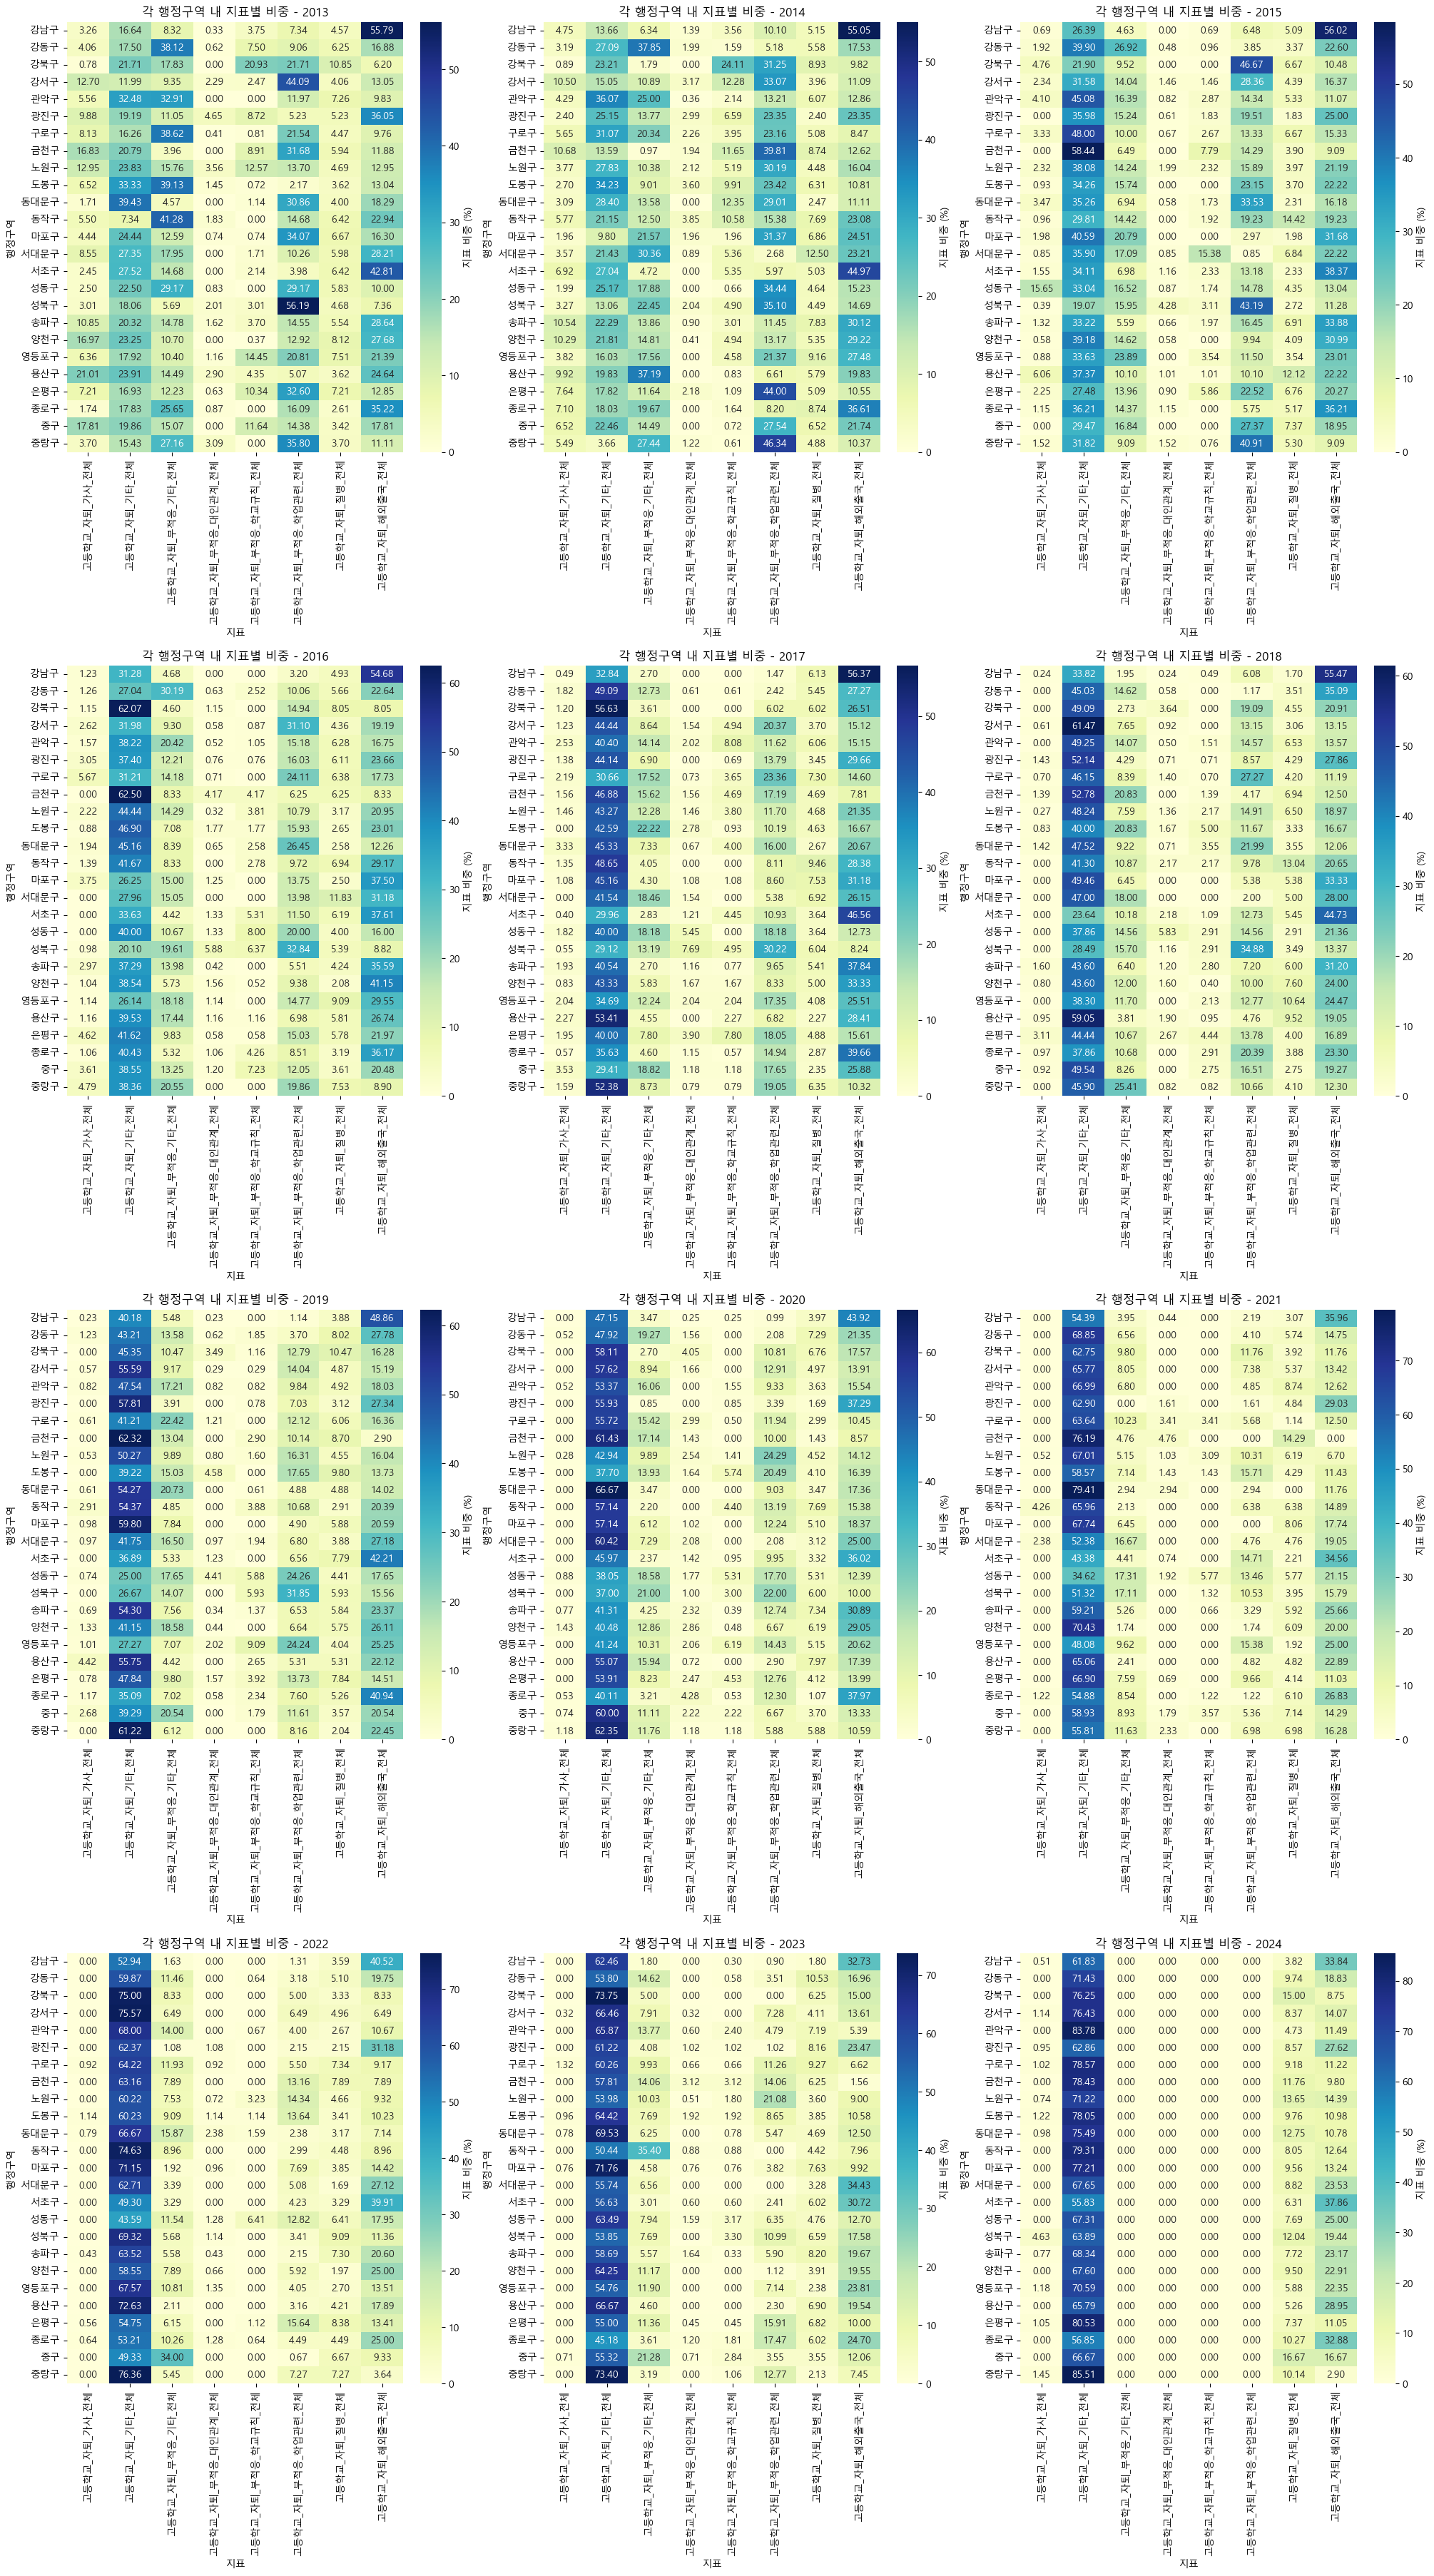

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 연도 리스트
years = range(2013, 2025)

# 서브플롯 설정
fig, axes = plt.subplots(len(years) // 3, 3, figsize=(20, len(years) * 3), constrained_layout=True)
axes = axes.flatten()  # 서브플롯 인덱싱을 쉽게 하기 위해 1D 배열로 변환

for i, year in enumerate(years):
    # <1> 연도별 데이터 추출
    cond = df_hs_1['연도'] == year
    hs_year = df_hs_1.loc[cond]
    hs_year = hs_year.pivot_table(index='행정구역', values=['고등학교_자퇴_가사_전체','고등학교_자퇴_기타_전체','고등학교_자퇴_부적응_기타_전체','고등학교_자퇴_부적응_대인관계_전체','고등학교_자퇴_부적응_학교규칙_전체','고등학교_자퇴_부적응_학업관련_전체','고등학교_자퇴_질병_전체','고등학교_자퇴_해외출국_전체'],aggfunc='sum').reset_index()
    hs_year = hs_year.loc[(hs_year['행정구역'] != '소계')]

    # <2> 행정구역 내 지표별 비중 계산
    region_sums = hs_year.set_index('행정구역')
    region_factors = region_sums.div(region_sums.sum(axis=1), axis=0) * 100

    # 히트맵 그리기
    sns.heatmap(region_factors, annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[i],
                cbar_kws={'label': '지표 비중 (%)'})
    axes[i].set_title(f'각 행정구역 내 지표별 비중 - {year}')
    axes[i].set_xlabel('지표')
    axes[i].set_ylabel('행정구역')

plt.show()



### 결과 해석    
1. 모든 년도에서 '고등학교_자퇴_기타'가 가장 큰 비중을 차지함 -> 회귀분석 혹은 정성적 방법을 통해 이 요인을 더 구체적으로 규명할 필요가 있음   
2. 두번째로 해외출국에 의한 자퇴가 큰 비중 차지   
3. 부적응 중 기타와 학업관련으로 인한 자퇴가 많았으나, 현재로 올수록 점점 감소하는 추세임 (현재로 올수록 자퇴_기타 증가)   
4. 부적응은 기타 -> 학업관련 -> 질병 순   
5. 과거에는 학교 규칙으로 인한 자퇴가 많았음, 현재로 갈수록 주는 추세임. 전체적인 학업중단 수치는 비슷하나, 기타가 증가함 -> 개인정보 문제에 따른 증가로 파악됨  
6. 요인에 따라 분류하기 보다, 구별로 특징을 파악하는 것이 좋아보임 

## 3.2.1 (절대비교) 연도별 행정구역 학업 중단자 총 합 변화율 파악하기

In [22]:
# 2번째 열부터 마지막 열까지 합계를 구해 '전체합' 컬럼으로 추가
df_hs_1['전체합'] = df_hs_1.iloc[:, 2:].sum(axis=1)

# 결과 확인
print(df_hs_1[['연도', '행정구역', '전체합']])

df_hs_1

       연도 행정구역    전체합
0    2013  강남구  622.0
1    2013  강동구  336.0
2    2013  강북구  134.0
3    2013  강서구  600.0
4    2013  관악구  242.0
..    ...  ...    ...
306  2024  용산구   76.0
307  2024  은평구  193.0
308  2024  종로구  146.0
309  2024   중구  116.0
310  2024  중랑구   69.0

[311 rows x 3 columns]


연도 행정구역  고등학교_면제_면제계_전체  고등학교_유예_유예계_전체  고등학교_자퇴_가사_전체  고등학교_자퇴_기타_전체  \
0    2013  강남구             1.0             2.0           20.0          102.0   
1    2013  강동구             0.0             3.0           13.0           56.0   
2    2013  강북구             0.0             0.0            1.0           28.0   
3    2013  강서구             0.0             4.0           72.0           68.0   
4    2013  관악구             0.0             2.0           13.0           76.0   
..    ...  ...             ...             ...            ...            ...   
306  2024  용산구             0.0             0.0            0.0           50.0   
307  2024  은평구             0.0             0.0            2.0          153.0   
308  2024  종로구             0.0             0.0            0.0           83.0   
309  2024   중구             0.0             0.0            0.0           76.0   
310  2024  중랑구             0.0             0.0            1.0           59.0   

     고등학교_자퇴_부적응_기타_전체  고등학교_자퇴_부적응_대인관계_전체  고등학교_자퇴_부적응_학교규칙_전체  \
0                 51.0                  2.0                 23.0   
1                122.0                  2.0                 24.0   
2                 23.0                  0.0                 27.0   
3                 53.0                 13.0                 14.0   
4                 77.0                  0.0                  0.0   
..                 ...                  ...                  ...   
306                0.0                  0.0                  0.0   
307                0.0                  0.0                  0.0   
308                0.0                  0.0                  0.0   
309                0.0                  0.0                  0.0   
310                0.0                  0.0                  0.0   

     고등학교_자퇴_부적응_학업관련_전체  고등학교_자퇴_질병_전체  고등학교_자퇴_해외출국_전체  고등학교_제적_제적계_전체  \
0                   45.0           28.0            342.0             0.0   
1                   29.0           20.0             54.0             0.0   
2                   28.0           14.0              8.0             0.0   
3                  250.0           23.0             74.0             0.0   
4                   28.0           17.0             23.0             0.0   
..                   ...            ...              ...             ...   
306                  0.0            4.0             22.0             0.0   
307                  0.0           14.0             21.0             0.0   
308                  0.0           15.0             48.0             0.0   
309                  0.0           19.0             19.0             0.0   
310                  0.0            7.0              2.0             0.0   

     고등학교_퇴학_학교폭력위원회_전체  고등학교_퇴학_학칙위반에따른징계_전체    전체합  
0                   5.0                   1.0  622.0  
1                   0.0                  13.0  336.0  
2                   2.0                   3.0  134.0  
3                   1.0                  28.0  600.0  
4                   2.0                   4.0  242.0  
..                  ...                   ...    ...  
306                 0.0                   0.0   76.0  
307                 0.0                   3.0  193.0  
308                 0.0                   0.0  146.0  
309                 0.0                   2.0  116.0  
310                 0.0                   0.0   69.0  

[311 rows x 16 columns]

In [23]:
df_hs_1_sum = df_hs_1[['연도', '행정구역', '전체합']]
cond__ = (df_hs_1_sum['행정구역'] != '소계')
cond_ = (df_hs_1_sum['연도'] != 2024)
df_hs_1_sum = df_hs_1_sum.loc[cond__ & cond_]  # 각 조건을 괄호로 묶음
df_hs_1_sum


연도 행정구역    전체합
0    2013  강남구  622.0
1    2013  강동구  336.0
2    2013  강북구  134.0
3    2013  강서구  600.0
4    2013  관악구  242.0
..    ...  ...    ...
281  2023  용산구   90.0
282  2023  은평구  220.0
283  2023  종로구  166.0
284  2023   중구  143.0
285  2023  중랑구   95.0

[275 rows x 3 columns]

In [24]:
!pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import plotly.express as px

# 연도와 행정구역별로 전체합의 변화를 선 그래프로 표현
fig = px.line(df_hs_1_sum, x='연도', y='전체합', color='행정구역', title='연도별 행정구역 내 전체 학업 중단자 수 변화')

fig.update_layout(width=1200, height=800)  
fig.update_xaxes(tickmode='linear')

# 그래프 표시
fig.show()


In [26]:
import plotly.express as px

# 강조할 행정구역 리스트 설정
highlight = ["강남구", "노원구", '강서구','송파구']

# 그래프 생성
fig = px.line(df_hs_1_sum, x='연도', y='전체합', color='행정구역', title='연도별 행정구역 내 전체 학업 중단자 수 변화')

# 강조할 행정구역을 제외한 나머지의 투명도를 낮게 설정
for trace in fig.data:
    if trace.name not in highlight:
        trace.update(opacity=0.2)  # 투명도 설정 (0.2는 낮은 투명도)

# 그래프 크기 및 축 설정
fig.update_layout(width=1200, height=800)
fig.update_xaxes(tickmode='linear')

# 그래프 표시
fig.show()


- 결과정리 : 수가 많은 곳은 강남구, 노원구, 강서구 학생 수 대비 학업중단율이 가장 많은 곳은 중구, 종로구
- 그 구의 전체 학생 수 대비 변화 비율을 파악해야할 듯함 -> 그러면 어떤 구가 학업 중단 학생이 많은지를 절대적으로 파악할 수 있음(-> 특정 지역의 문제 상황을 알 수 있다-> 그 구의 정책과 연결)

## 3.2.2 (상대비교) 연도별 행정구역 학업 중단율 파악하기

In [28]:
# 학령인구 :  6~21세 사이의 인구
all_hs_stu = pd.read_csv(r"C:\Users\cub72\Desktop\2024\파이썬데이터분석\플젝\dataset\M_H_School_Data.csv")
all_hs_stu = all_hs_stu.loc[all_hs_stu['구분별(1)'] == '고등학교']
all_hs_stu.drop(columns='구분별(1)', inplace=True)
all_hs_stu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 1 to 51
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(2)  26 non-null     object
 1   2013     26 non-null     int64 
 2   2014     26 non-null     int64 
 3   2015     26 non-null     int64 
 4   2016     26 non-null     int64 
 5   2017     26 non-null     int64 
 6   2018     26 non-null     int64 
 7   2019     26 non-null     int64 
 8   2020     26 non-null     int64 
 9   2021     26 non-null     int64 
 10  2022     26 non-null     int64 
 11  2023     26 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 2.6+ KB


In [29]:

# all_hs_stu의 '자치구별(2)' 열을 '행정구역'으로 변경
all_hs_stu = all_hs_stu.rename(columns={'자치구별(2)': '행정구역'})

# all_hs_stu의 데이터를 melt하여 연도와 전체학생수 컬럼을 생성
all_hs_stu_melted = all_hs_stu.melt(id_vars=['행정구역'], var_name='연도', value_name='전체학생수')
all_hs_stu_melted

행정구역    연도   전체학생수
0     소계  2013  334123
1    종로구  2013   13538
2     중구  2013    9600
3    용산구  2013    8029
4    성동구  2013    7290
..   ...   ...     ...
281  관악구  2023    8478
282  서초구  2023    9342
283  강남구  2023   17403
284  송파구  2023   13735
285  강동구  2023   10839

[286 rows x 3 columns]

In [30]:
all_hs_stu_melted

행정구역    연도   전체학생수
0     소계  2013  334123
1    종로구  2013   13538
2     중구  2013    9600
3    용산구  2013    8029
4    성동구  2013    7290
..   ...   ...     ...
281  관악구  2023    8478
282  서초구  2023    9342
283  강남구  2023   17403
284  송파구  2023   13735
285  강동구  2023   10839

[286 rows x 3 columns]

In [31]:
df_hs_1_sum

연도 행정구역    전체합
0    2013  강남구  622.0
1    2013  강동구  336.0
2    2013  강북구  134.0
3    2013  강서구  600.0
4    2013  관악구  242.0
..    ...  ...    ...
281  2023  용산구   90.0
282  2023  은평구  220.0
283  2023  종로구  166.0
284  2023   중구  143.0
285  2023  중랑구   95.0

[275 rows x 3 columns]

In [32]:
# '연도' 데이터 타입 통일
all_hs_stu_melted['연도'] = all_hs_stu_melted['연도'].astype(int)

# df_hs_1_sum와 all_hs_stu_melted를 연도와 행정구역을 기준으로 병합
df_hs_1_sum = df_hs_1_sum.merge(all_hs_stu_melted, on=['연도','행정구역'])
df_hs_1_sum


연도 행정구역    전체합  전체학생수
0    2013  강남구  622.0  25600
1    2013  강동구  336.0  15749
2    2013  강북구  134.0   7533
3    2013  강서구  600.0  22955
4    2013  관악구  242.0  13578
..    ...  ...    ...    ...
270  2023  용산구   90.0   4390
271  2023  은평구  220.0  11564
272  2023  종로구  166.0   7365
273  2023   중구  143.0   5260
274  2023  중랑구   95.0   5812

[275 rows x 4 columns]

In [33]:
#학업중단율 컬럼 추가
df_hs_1_sum = df_hs_1_sum.rename(columns={'전체합': '학업중단자합'})
df_hs_1_sum['학업중단율'] = df_hs_1_sum['학업중단자합'] /df_hs_1_sum['전체학생수']
df_hs_1_sum.to_csv('학업중단율컬럼추가_13to23.csv', encoding = 'cp949')

In [34]:
df_hs_1_sum

연도 행정구역  학업중단자합  전체학생수     학업중단율
0    2013  강남구   622.0  25600  0.024297
1    2013  강동구   336.0  15749  0.021335
2    2013  강북구   134.0   7533  0.017788
3    2013  강서구   600.0  22955  0.026138
4    2013  관악구   242.0  13578  0.017823
..    ...  ...     ...    ...       ...
270  2023  용산구    90.0   4390  0.020501
271  2023  은평구   220.0  11564  0.019025
272  2023  종로구   166.0   7365  0.022539
273  2023   중구   143.0   5260  0.027186
274  2023  중랑구    95.0   5812  0.016345

[275 rows x 5 columns]

In [35]:
df_hs_1_sum[['연도', '행정구역', '학업중단율']]

연도 행정구역     학업중단율
0    2013  강남구  0.024297
1    2013  강동구  0.021335
2    2013  강북구  0.017788
3    2013  강서구  0.026138
4    2013  관악구  0.017823
..    ...  ...       ...
270  2023  용산구  0.020501
271  2023  은평구  0.019025
272  2023  종로구  0.022539
273  2023   중구  0.027186
274  2023  중랑구  0.016345

[275 rows x 3 columns]

In [36]:
# 중복된 데이터 확인
duplicates = df_hs_1_sum[df_hs_1_sum.duplicated(subset=['연도', '행정구역'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [연도, 행정구역, 학업중단자합, 전체학생수, 학업중단율]
Index: []


In [37]:
import pandas as pd
import plotly.express as px

# 데이터프레임을 학업중단율 기준으로 내림차순 정렬
df_sorted = df_hs_1_sum.sort_values(by='학업중단율', ascending=False)

# 막대 그래프 생성 (정렬된 데이터 사용)
fig = px.bar(
    df_sorted, 
    x='연도', 
    y='학업중단율', 
    color='행정구역', 
    title='<1>연도별 행정구역 학업중단율 비교 (내림차순 정렬)',
    barmode='group'  # 막대를 연도별로 그룹화
)
# 그래프 크기 설정
fig.update_layout(
    width=2000,  # 그래프 너비
    height=500   # 그래프 높이
)
# 그래프 표시
fig.show()


# 결과해석
# 1위:중구, 2위:종로구, 3위:용산구(2020,21,22)/노원구(23)/강서구(24), 4위:강남구(20,21,24)/강서구(22,23), 5위:관악구(20,21,23,24)/동대문구(22)
# 분석 대상 구 선정 : 중구, 종로구, 용산구, 강남구, 강서구, 관악구 // 노원구(3위 한 번이지만 꾸준히 존재), 동대문구

In [ ]:
import pandas as pd
import plotly.express as px

# 라인 그래프 생성
fig = px.line(
    df_hs_1_sum, 
    x='연도', 
    y='학업중단율', 
    color='행정구역', 
    title='<1> 연도별 행정구역 학업중단율 비교',
    text='학업중단율'  # 데이터 포인트에 학업중단율 표시
)

# 그래프 크기 및 x축 모두 표시 설정
fig.update_layout(
    width=1200,  # 그래프 너비
    height=800,  # 그래프 높이
    xaxis=dict(
        tickmode='linear',  # x축의 모든 값 표시
        title='연도'  # x축 레이블
    ),
    yaxis=dict(
        title='학업중단율'  # y축 레이블
    )
)

# 텍스트 포맷팅: 소수 둘째 자리까지
fig.update_traces(
    texttemplate='%{text:.2f}',  # 텍스트를 소수 둘째 자리까지 표시
    textposition='top center'   # 텍스트 위치 조정
)

# 그래프 표시
fig.show()



In [44]:
import pandas as pd
import plotly.express as px

# 강조할 행정구역 리스트
highlight_districts = ["종로구", "중구", "용산구", "성동구", "강남구", "강서구"]

# 라인 그래프 생성
fig = px.line(
    df_hs_1_sum, 
    x='연도', 
    y='학업중단율', 
    color='행정구역', 
    title='<1> 연도별 행정구역 학업중단율 비교'
)

# 그래프 크기 및 x축 모두 표시 설정
fig.update_layout(
    width=1200,  # 그래프 너비
    height=800,  # 그래프 높이
    xaxis=dict(
        tickmode='linear',  # x축의 모든 값 표시
        title='연도'  # x축 레이블
    ),
    yaxis=dict(
        title='학업중단율'  # y축 레이블
    )
)
'''
# 강조하지 않을 행정구역의 투명도 낮추기
for trace in fig.data:
    if trace.name not in highlight_districts:
        trace.update(opacity=0.2)  # 투명도 낮추기 (0.2)
'''
# 그래프 표시
fig.show()


In [40]:
!pip install kaleido


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px

# 히트맵 생성 (x축: 연도, y축: 행정구역)
fig = px.imshow(
    df_hs_20_to_24.pivot(index='행정구역', columns='연도', values='학업중단율'),  # x축과 y축 바꿈
    title='<2>행정구역별 연도 학업중단율 히트맵',
    labels={'color': '학업중단율'},  # 색상 범례의 이름 설정
    color_continuous_scale='Blues'  # 색상 스케일 설정
)

# y축 레이블 모두 표시 및 간격 조정
fig.update_layout(
    yaxis=dict(
        tickmode='linear',  # 모든 y축 틱 표시
        tickfont=dict(size=12),  # y축 글자 크기 조정
    ),
    height=800  # 그래프 높이 조정으로 간격 넓히기
)

# 그래프 표시
fig.show()


## 3.3 강남구 연도별 유형 확인


In [ ]:
hs_gu1 = df_hs_1.loc[df_hs_1['행정구역']=='강남구']
hs_gu1.head()

연도 행정구역  고등학교_면제_면제계_전체  고등학교_유예_유예계_전체  고등학교_자퇴_가사_전체  고등학교_자퇴_기타_전체  \
0    2013  강남구             1.0             2.0           20.0          102.0   
26   2014  강남구             0.0             0.0           24.0           69.0   
52   2015  강남구             0.0             1.0            3.0          114.0   
78   2016  강남구             0.0             0.0            5.0          127.0   
104  2017  강남구             0.0             0.0            2.0          134.0   

     고등학교_자퇴_부적응_기타_전체  고등학교_자퇴_부적응_대인관계_전체  고등학교_자퇴_부적응_학교규칙_전체  \
0                 51.0                  2.0                 23.0   
26                32.0                  7.0                 18.0   
52                20.0                  0.0                  3.0   
78                19.0                  0.0                  0.0   
104               11.0                  0.0                  0.0   

     고등학교_자퇴_부적응_학업관련_전체  고등학교_자퇴_질병_전체  고등학교_자퇴_해외출국_전체  고등학교_제적_제적계_전체  \
0                   45.0           28.0            342.0             0.0   
26                  51.0           26.0            278.0             5.0   
52                  28.0           22.0            242.0             3.0   
78                  13.0           20.0            222.0             0.0   
104                  6.0           25.0            230.0             0.0   

     고등학교_퇴학_학교폭력위원회_전체  고등학교_퇴학_학칙위반에따른징계_전체    전체합  
0                   5.0                   1.0  622.0  
26                  1.0                   1.0  512.0  
52                  1.0                   3.0  440.0  
78                  1.0                   1.0  408.0  
104                 1.0                   3.0  412.0

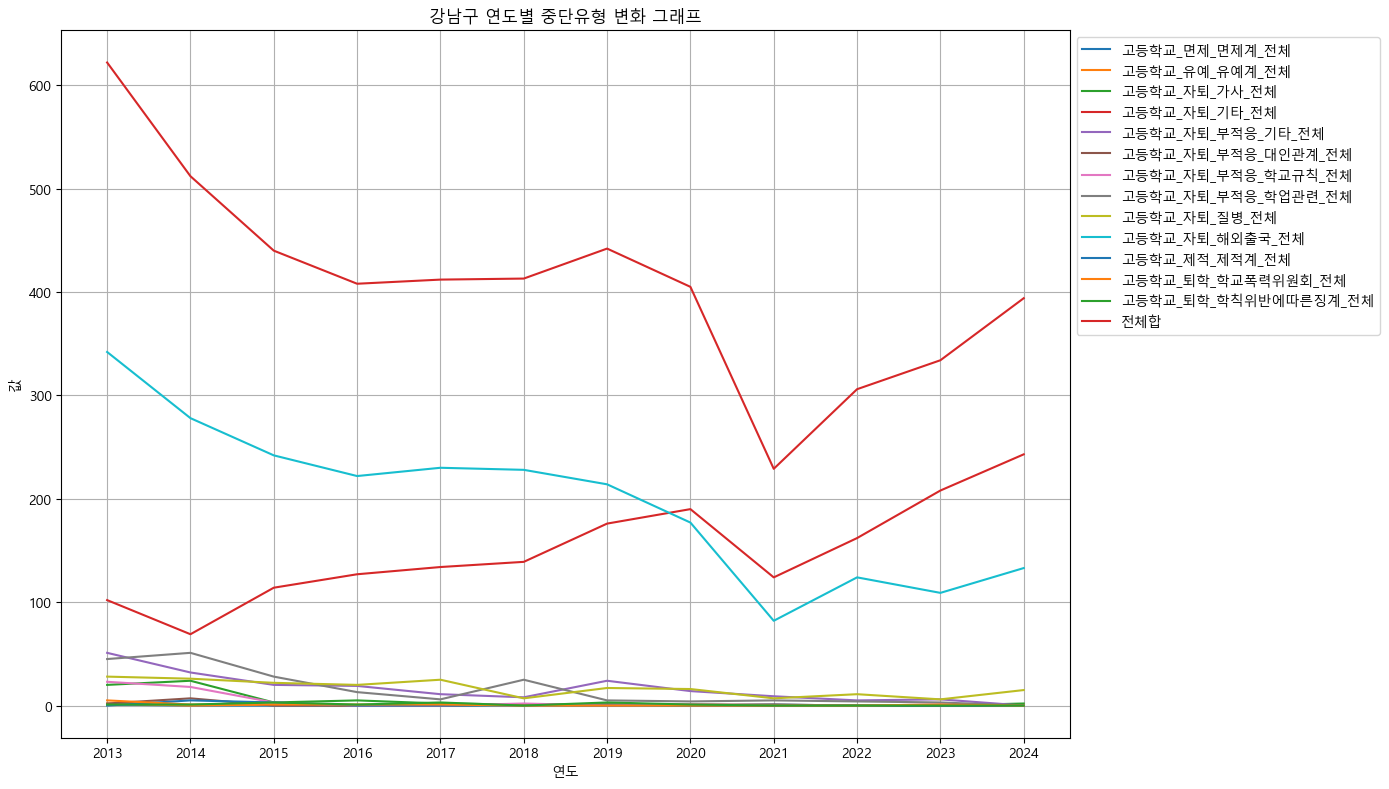

In [ ]:
import matplotlib.pyplot as plt

# 그래프 크기 설정 (직사각형 비율)
plt.figure(figsize=(14, 8))

# x축 설정: 연도
x = hs_gu1['연도']

# y축에 다변수 설정 및 line plot 생성
for col in hs_gu1.columns[2:]:  # 첫 두 컬럼은 '행정구역'과 '연도'이므로 나머지 컬럼을 사용
    plt.plot(x, hs_gu1[col], label=col)

# 그래프 세부 설정
plt.xlabel('연도')
plt.ylabel('값')
plt.title('강남구 연도별 중단유형 변화 그래프')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 범례를 오른쪽에 위치
plt.xticks(hs_gu1['연도'])  # x축에 모든 연도를 표시
plt.grid(True)
plt.tight_layout()
plt.show()


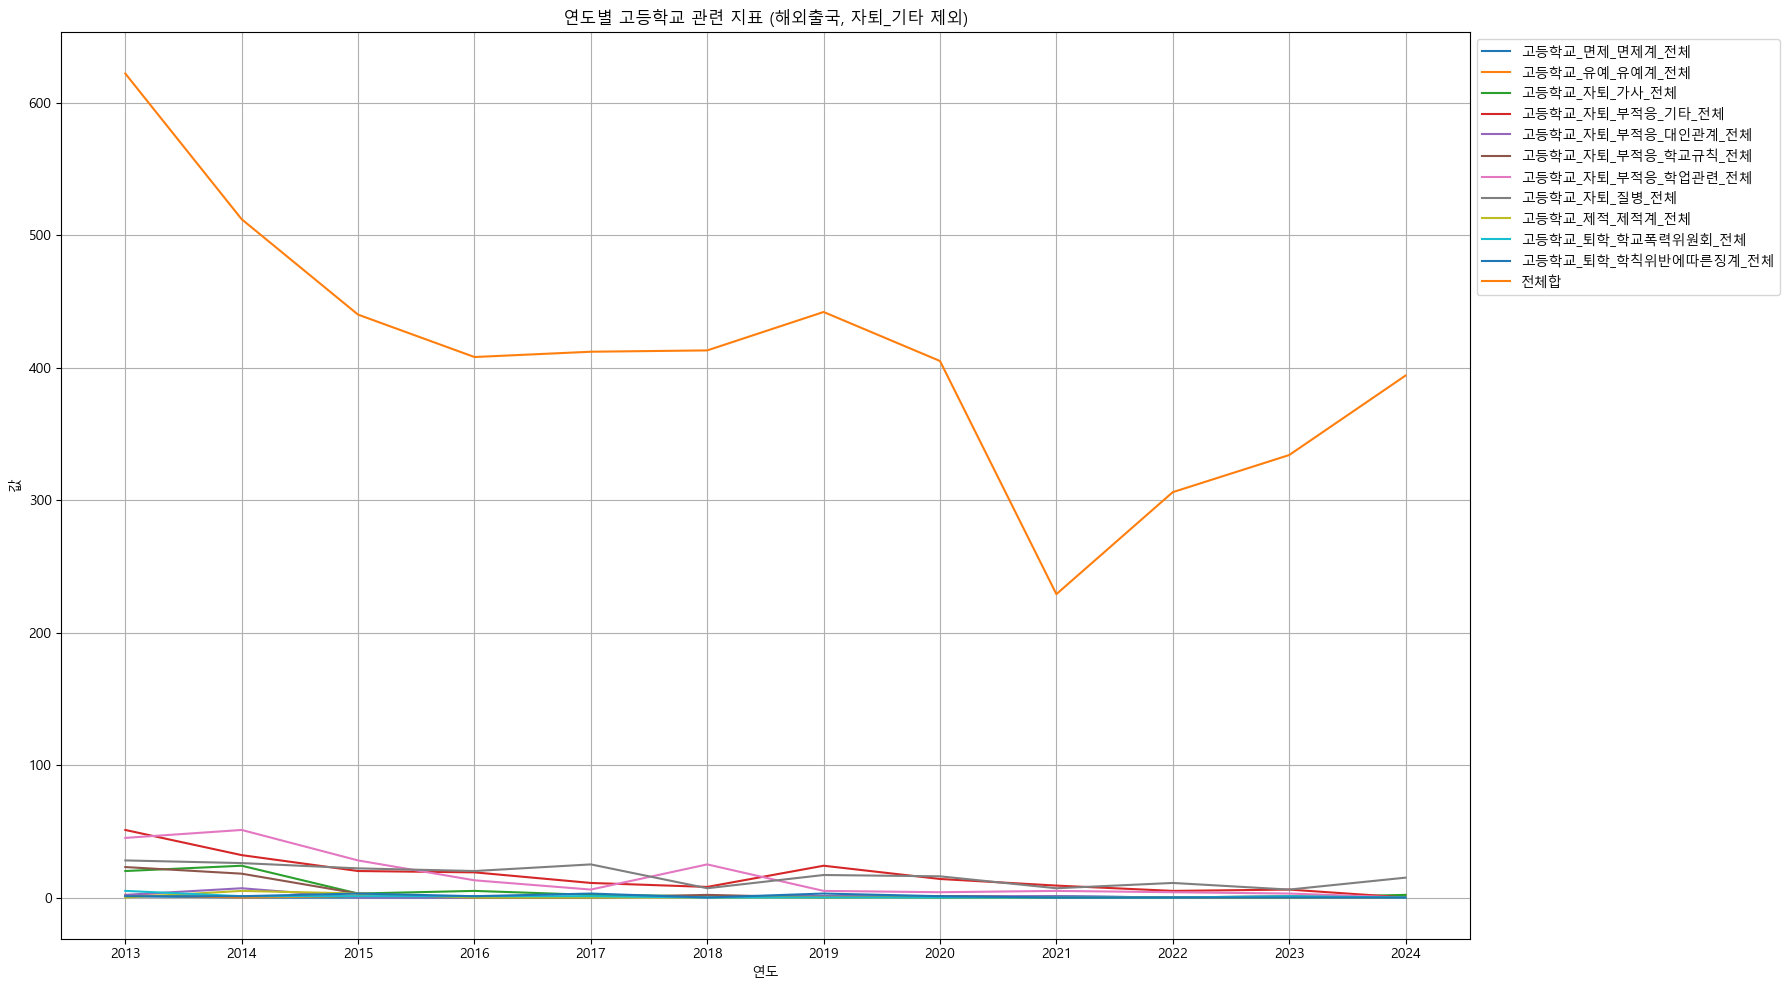

In [ ]:
#위에서 가장 높은 2개 빼고 보기

# 제외할 컬럼 리스트
exclude_columns = ['고등학교_자퇴_해외출국_전체', '고등학교_자퇴_기타_전체']

# 제외할 컬럼을 제외한 나머지 컬럼들만 선택
selected_columns = [col for col in hs_gu1.columns[2:] if col not in exclude_columns]

# 그래프 크기 설정 (직사각형 비율)
plt.figure(figsize=(18, 10))

# x축 설정: 연도
x = hs_gu1['연도']

# y축에 선택된 컬럼들만 설정 및 line plot 생성
for col in selected_columns:
    plt.plot(x, hs_gu1[col], label=col)

# 그래프 세부 설정
plt.xlabel('연도')
plt.ylabel('값')
plt.title('연도별 고등학교 관련 지표 (해외출국, 자퇴_기타 제외)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 범례를 오른쪽에 위치
plt.xticks(hs_gu1['연도'])  # x축에 모든 연도를 표시
plt.grid(True)
plt.tight_layout()
plt.show()


### 결과해석
해외출국이랑, 자퇴_기타 가 제일 많음 (전년도 다). 그래서 두개제외하고 추이를 봤을 때, 전반적으로 부적응,질병으로 인한 학업중단율이 눈에 띰. 그러나 최근에는 그런 원인으로 인한 중단은 감소하고, 질병으로 인한 중단은 꾸준히 존재